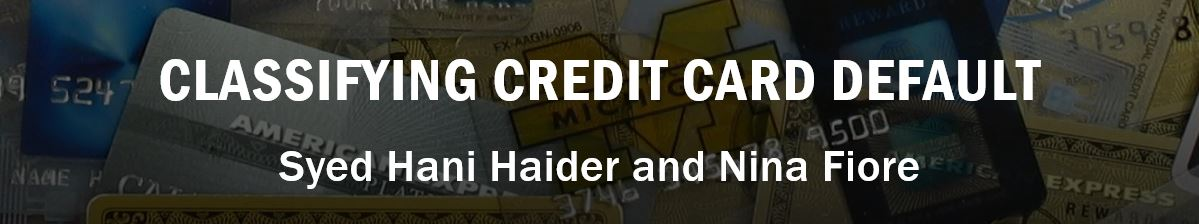

<h1><center>Code Walk</center></h1>

***

<h2><center>Problem Overview</center></h2>

* Goal: predict whether or not a client defaults on their credit card based on 189 predictor variables from AmEx
* Impact: analysis of credit card defaults can provide insight into the financial reliability of a potential client
* Dataset: American Express Credit Card Default dataset (5,531,451 x 191); toy dataset (100,000 x 191)
* Methods: PCA, Stepwise Selection, Modeling (Random Forest, XGBoost, SVM), paper replication (random oversampling)

<h2><center>General Approach</center></h2>

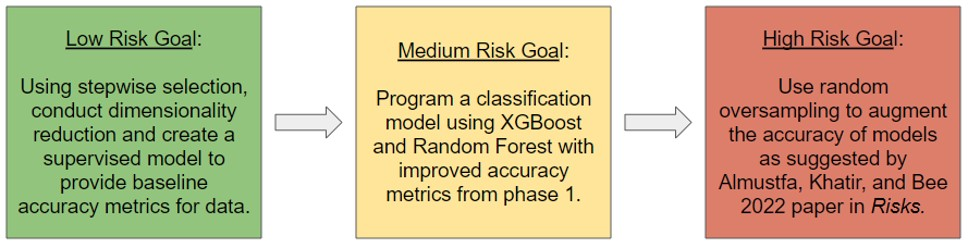

 
 ***
 


<h2><center>Methodology</center></h2>


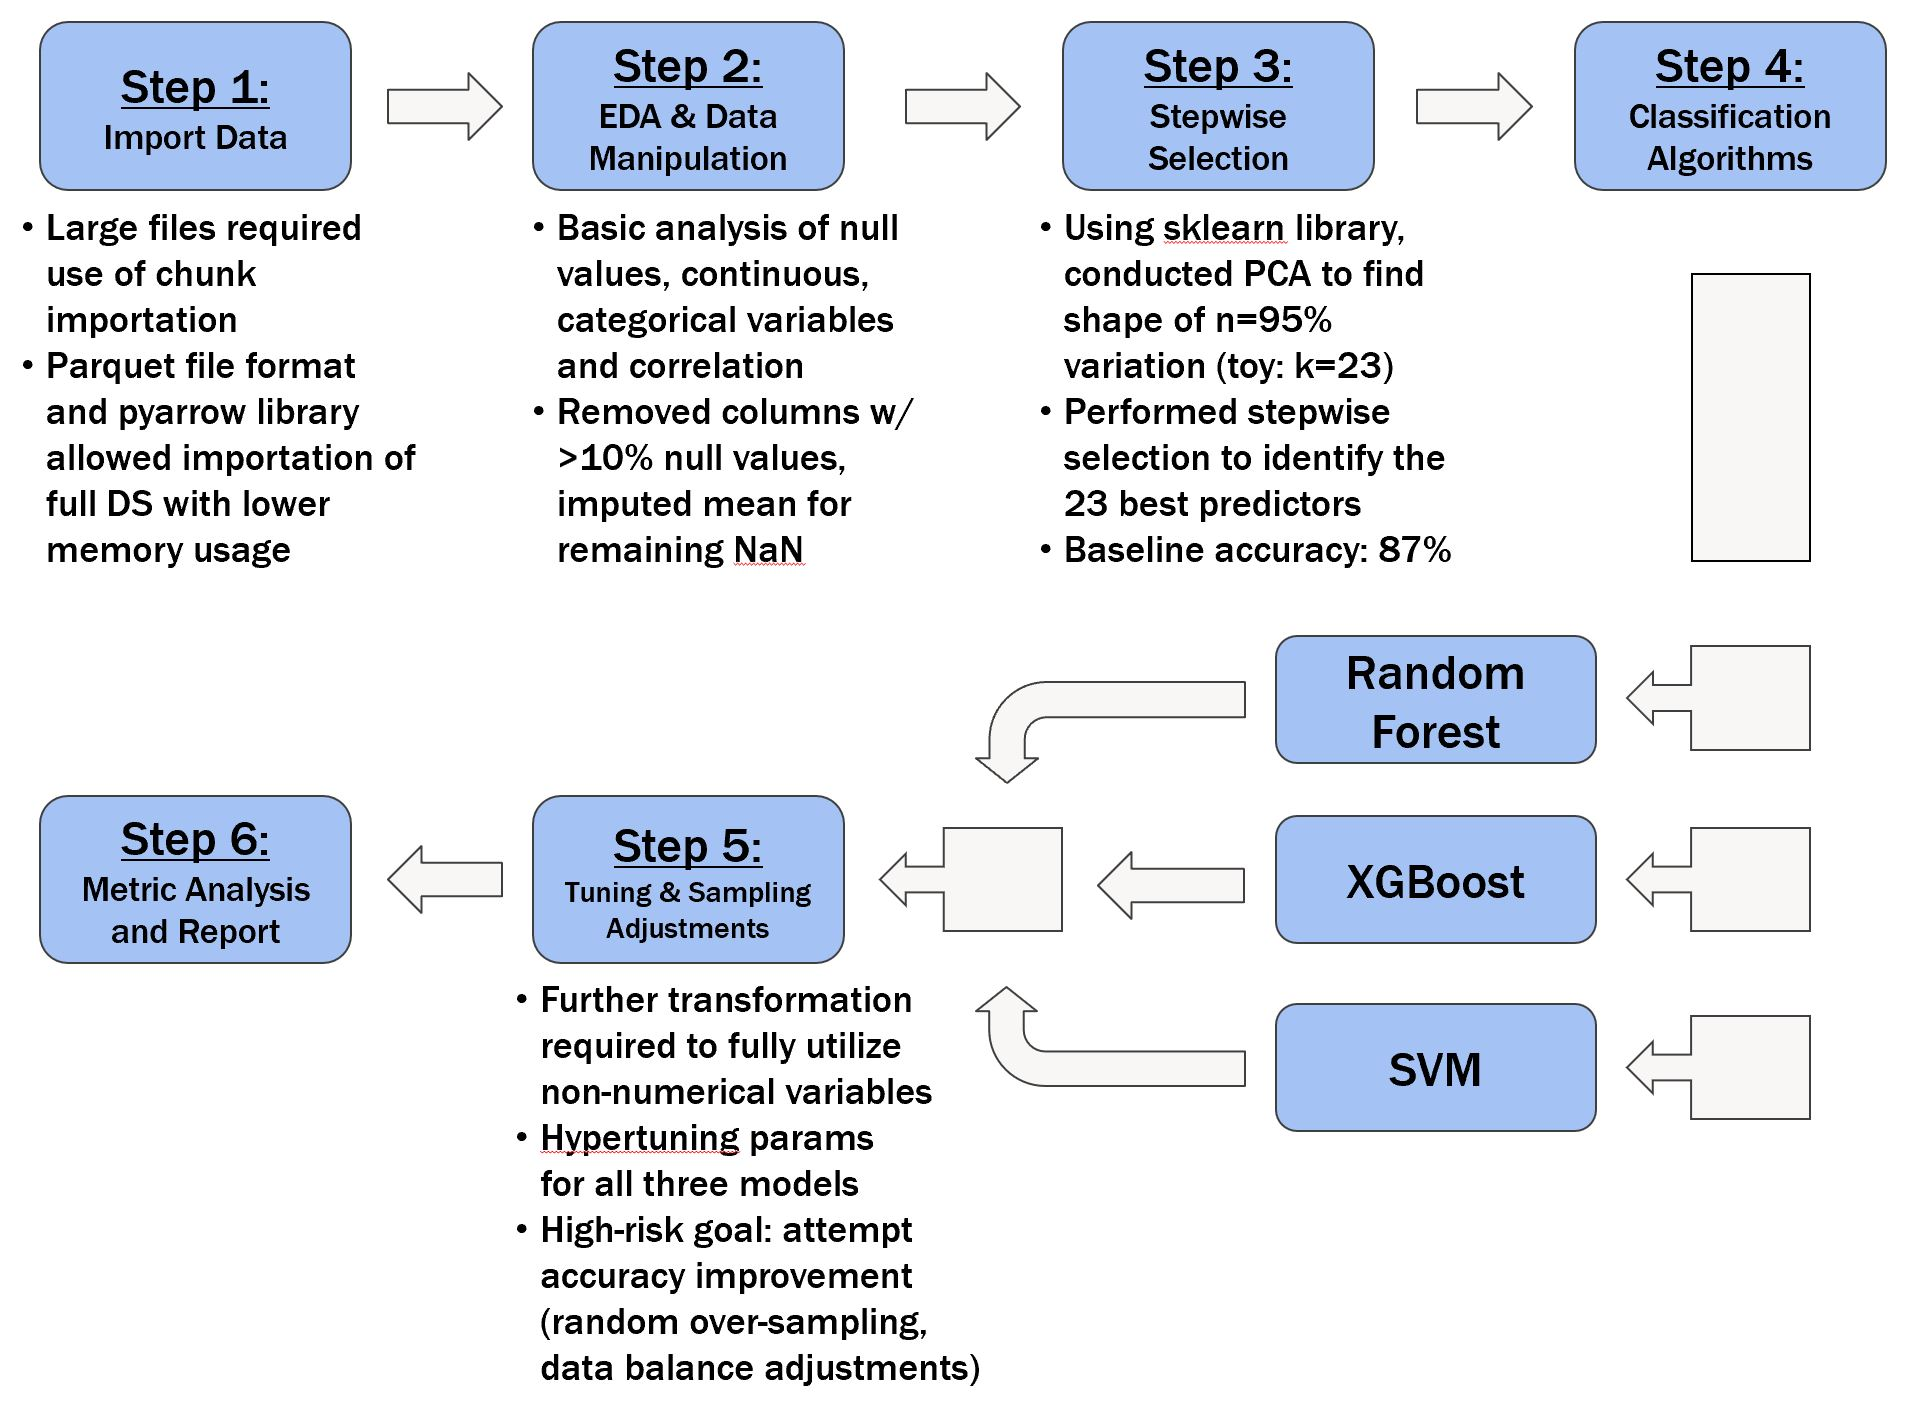

 
 ***
 


<h2><center>Random Forest Algorithm</center></h2>


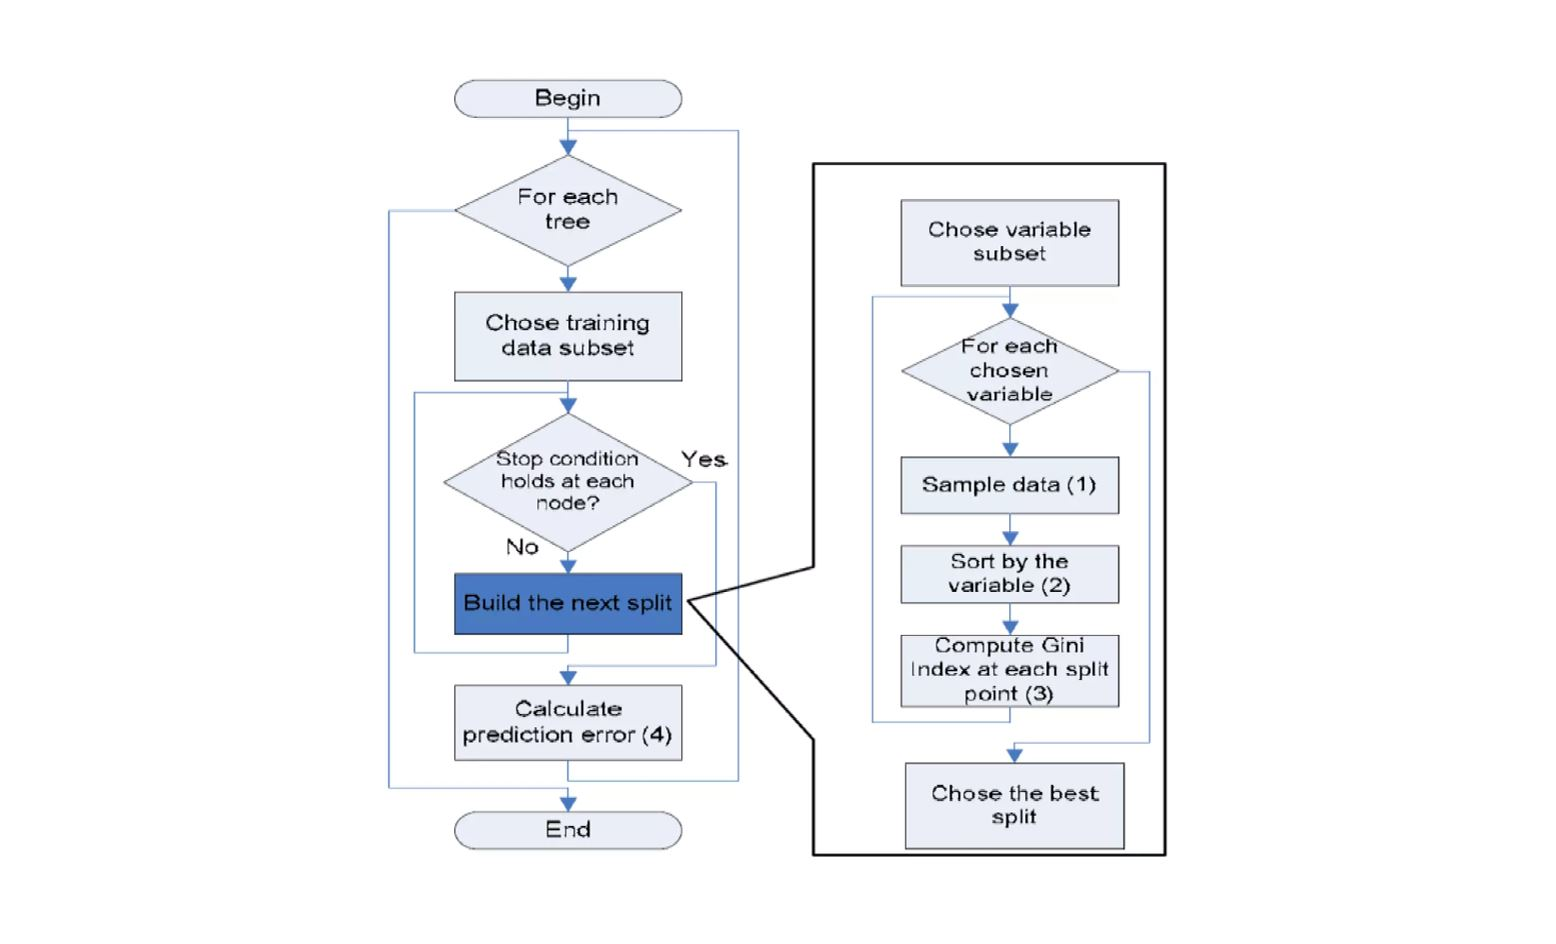

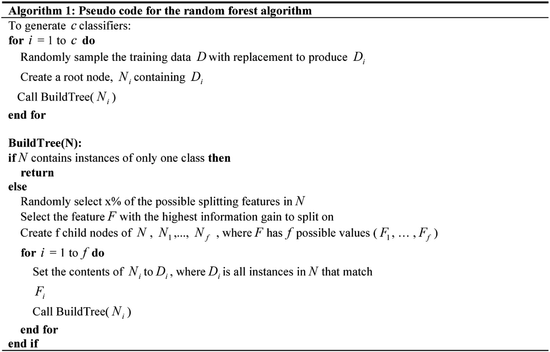

 
 ***
 


<h2><center>XGBoost Algorithm</center></h2>


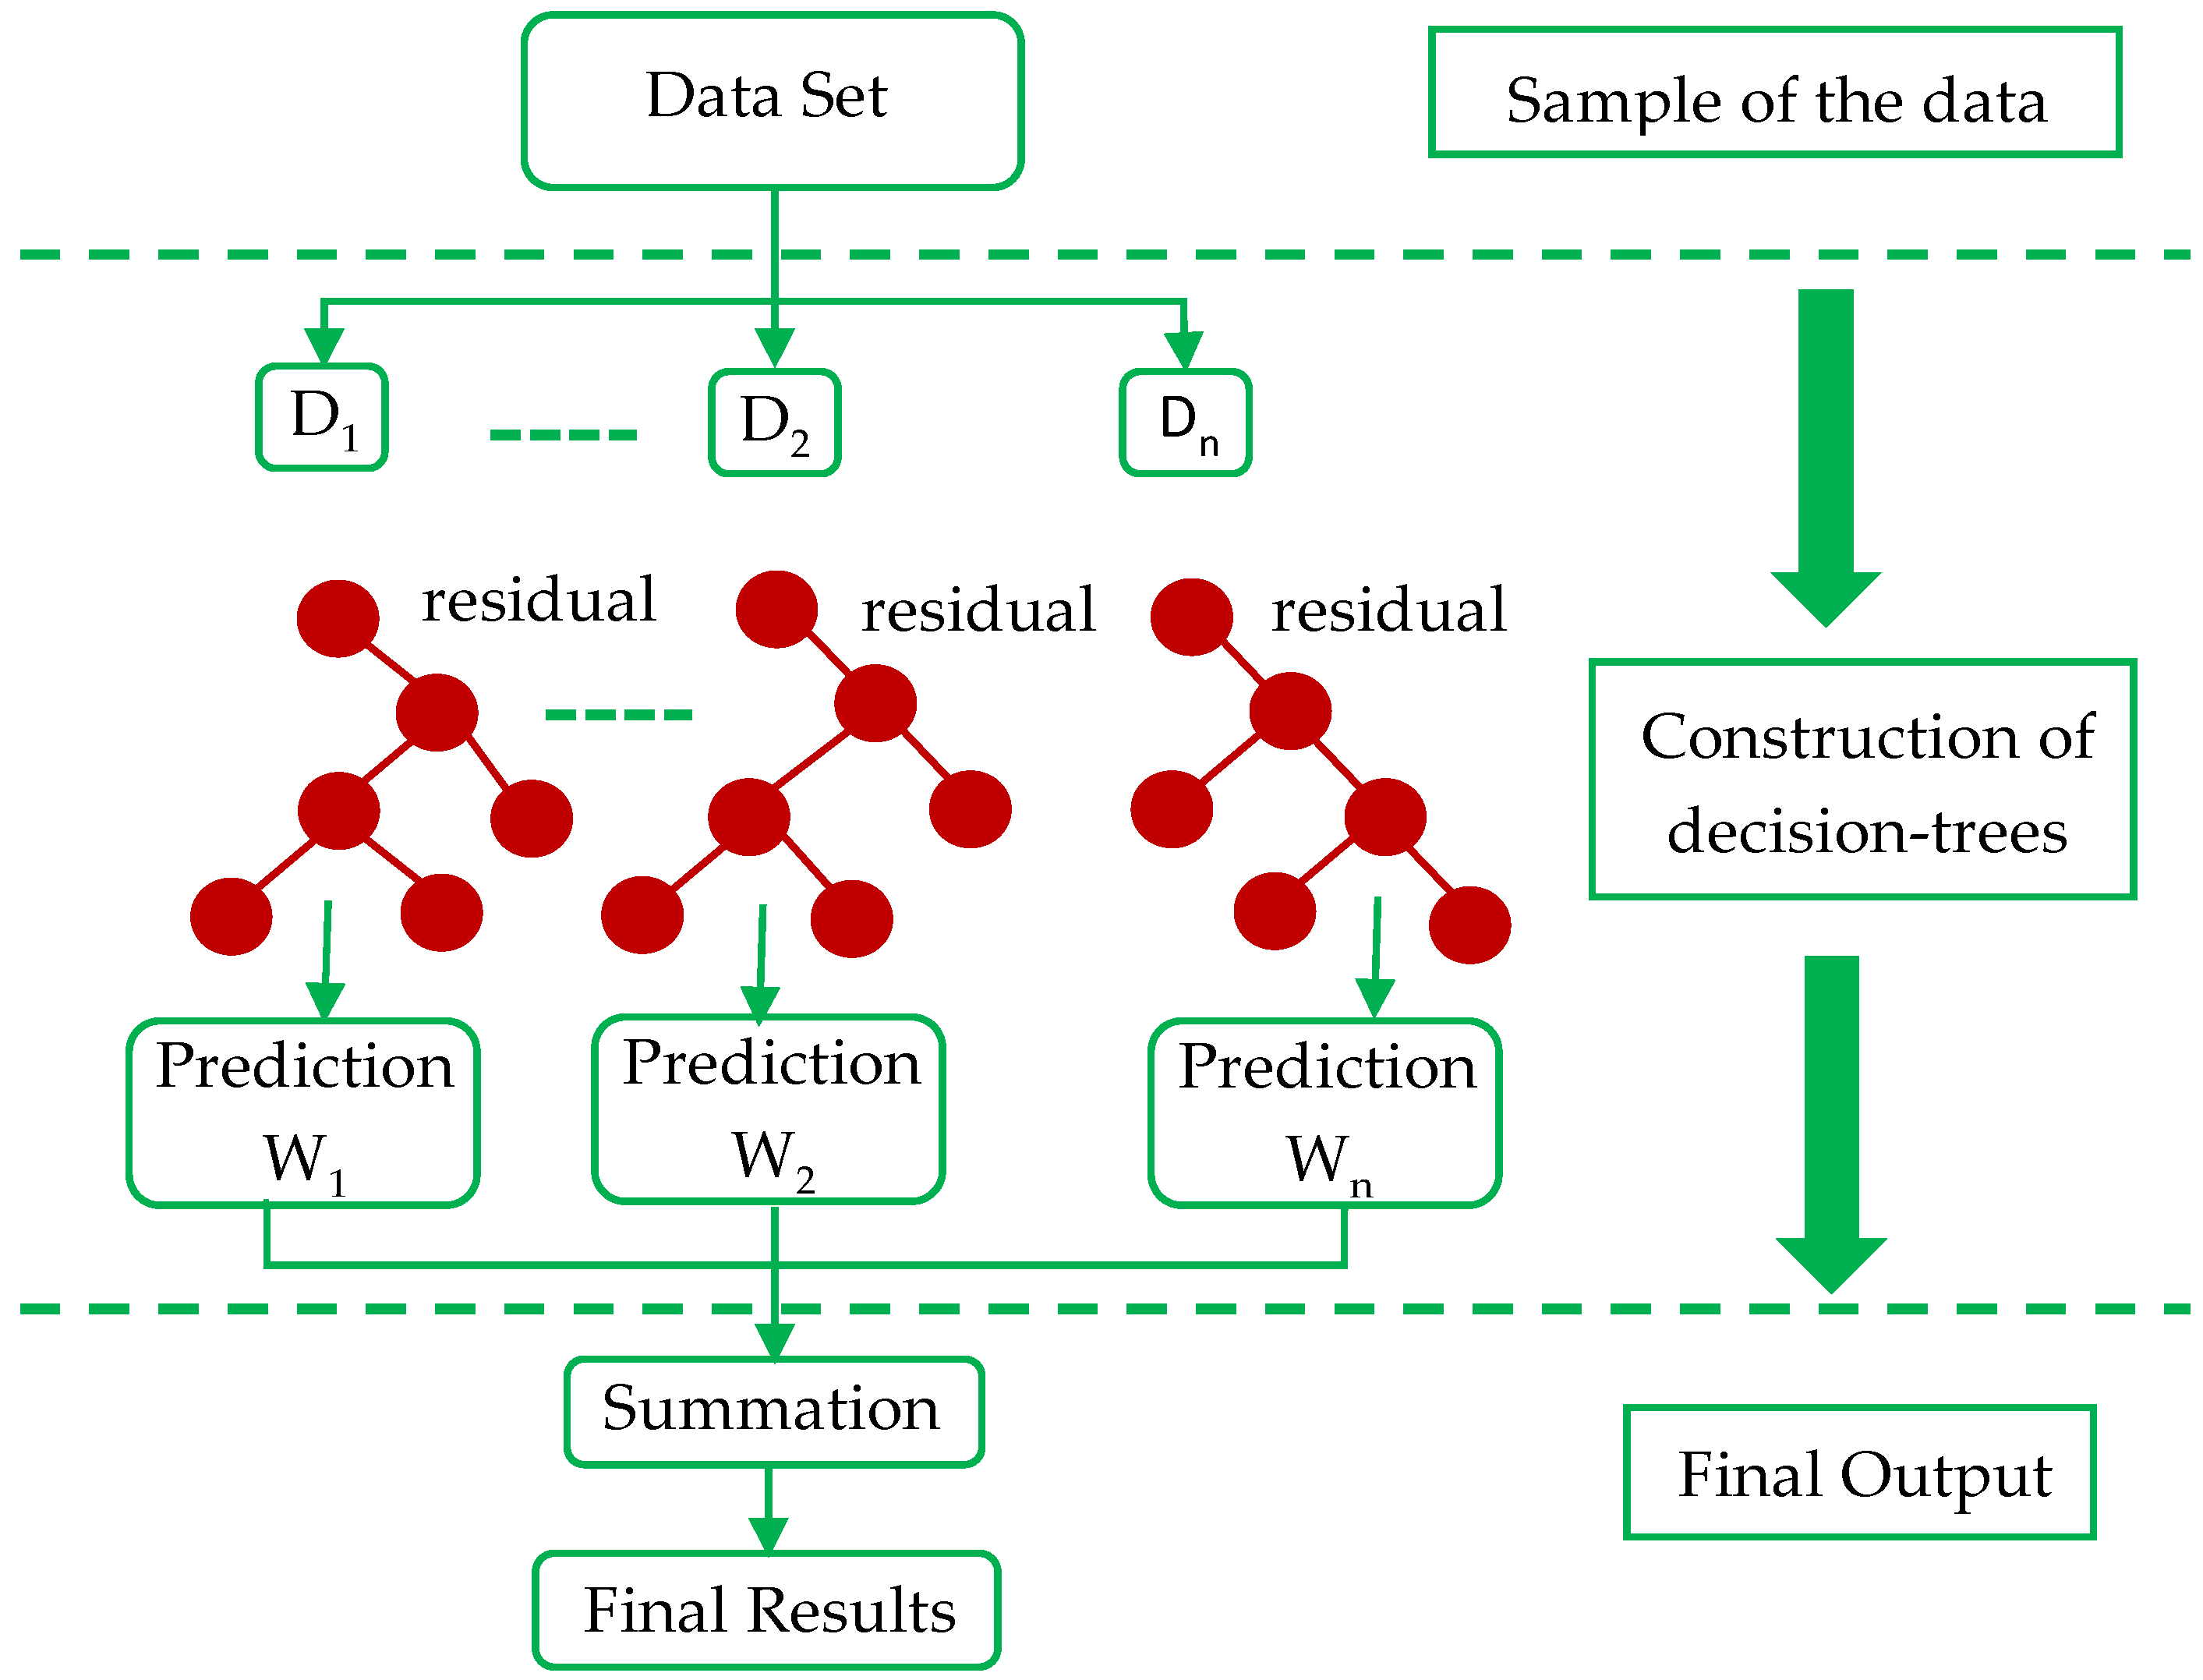

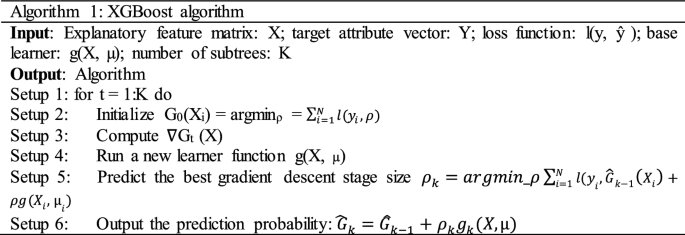

 
 ***
 


<h2><center>Support Vector Machine Algorithm</center></h2>


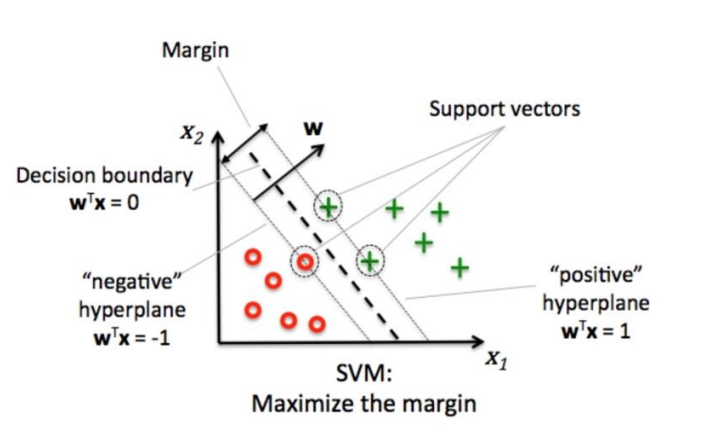

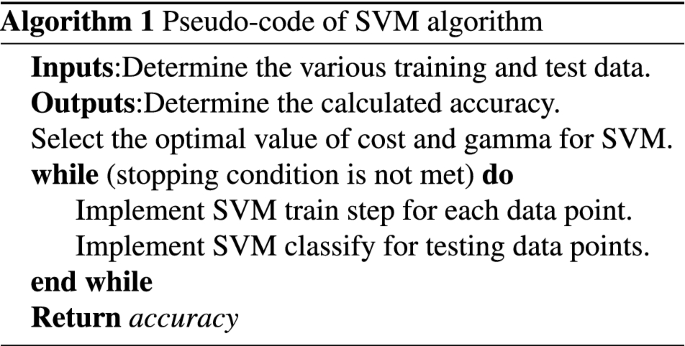

 
 ***
 

<h2><center>EDA</center></h2>

### Libraries:

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from matplotlib import pyplot as plt

### Import Data

In [2]:
# import the toy dataset
eda = pd.read_csv("data/merge_sampled.csv")

In [3]:
eda

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,3/9/2017,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,4/7/2017,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,5/28/2017,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,6/13/2017,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,7/16/2017,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,1/2/2018,0.458911,0.124405,0.597829,0.023698,0.004703,0.162860,0.000963,0.627714,...,NaN,NaN,0.004281,0.003969,0.003936,NaN,0.006478,0.003046,0.004138,0
99996,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,2/27/2018,0.363298,0.038383,0.675999,0.023201,0.006627,0.160133,0.000720,0.822903,...,NaN,NaN,0.004239,0.008563,0.003117,NaN,0.006679,0.007450,0.002982,0
99997,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,3/8/2018,0.356621,0.036849,0.645728,0.020585,0.004587,0.166246,0.003972,0.871214,...,NaN,NaN,0.009920,0.005579,0.008481,NaN,0.001516,0.005997,0.004767,0
99998,049e0948e285ec6767bf07e6e3f5e0919821ee200e359d...,3/29/2017,0.714477,0.000546,0.008019,0.817670,0.006265,NaN,0.008652,0.008341,...,NaN,NaN,1.006665,0.003085,0.914985,0.351957,1.001686,0.579711,0.454960,0


### Target Information

There are no missing values out of range values. Of the 8294 customer_IDs, 6096 (73.4 %) have a label of 0 (good customer, no default) and 2198 (26.5 %) have a label of 1 (bad customer, default).

In [4]:
eda.target.isna().sum()

0

In [5]:
eda[eda.target > 1]

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target


In [6]:
eda[eda.target < 0]

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target


In [7]:
# unique customer IDs
eda.customer_ID.nunique()

8294

In [8]:
bad = eda[eda.target == 1]
bad

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
104,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,3/15/2017,0.400025,0.000278,0.954861,0.023890,0.003140,NaN,0.008421,1.175081,...,NaN,NaN,1.002518,0.001170,0.870115,0.141214,1.003923,0.008945,0.736632,1
105,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,4/14/2017,0.405788,0.000269,0.944042,0.025613,0.008950,NaN,0.003707,1.177973,...,NaN,NaN,1.005944,0.003116,0.864712,0.145885,1.004833,0.002125,0.733311,1
106,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,5/15/2017,0.403615,0.032850,0.940261,0.026016,0.009074,NaN,0.008000,1.175785,...,NaN,NaN,1.006883,0.004455,0.871729,0.144555,1.000521,0.000765,0.729252,1
107,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,6/14/2017,0.391495,0.034461,0.936253,0.029538,0.005778,NaN,0.002849,1.174704,...,NaN,NaN,1.000132,0.002175,0.869414,0.151890,1.001034,0.008195,0.727660,1
108,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,7/15/2017,0.392356,0.037955,0.915764,0.028671,0.008595,NaN,0.002428,1.177958,...,NaN,NaN,1.001192,0.004609,0.869089,0.152654,1.007116,0.001493,0.727649,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99954,049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a1...,11/24/2017,0.508168,0.031211,0.728673,0.024651,0.000430,0.214742,0.009083,1.005197,...,NaN,NaN,1.007616,0.007317,0.943896,0.414324,1.003824,0.291847,0.099427,1
99955,049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a1...,12/25/2017,0.527567,0.036217,0.725777,0.024589,0.251386,0.208348,0.008015,1.003667,...,NaN,NaN,1.006324,0.000010,0.950824,0.413562,1.001365,0.298827,0.095157,1
99956,049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a1...,1/25/2018,0.526164,0.035330,0.714960,0.026882,0.251946,0.209647,0.005900,1.007715,...,NaN,NaN,1.001821,0.001326,0.951614,0.417832,1.004149,0.297445,0.100708,1
99957,049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a1...,2/22/2018,0.498874,0.038715,0.709952,0.021511,0.254056,0.211477,0.001525,0.998875,...,NaN,NaN,1.006805,0.007966,0.950035,0.421610,1.000564,0.349198,0.099730,1


In [9]:
good = eda[eda.target == 0]
good

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,3/9/2017,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,4/7/2017,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,5/28/2017,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,6/13/2017,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,7/16/2017,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,1/2/2018,0.458911,0.124405,0.597829,0.023698,0.004703,0.162860,0.000963,0.627714,...,NaN,NaN,0.004281,0.003969,0.003936,NaN,0.006478,0.003046,0.004138,0
99996,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,2/27/2018,0.363298,0.038383,0.675999,0.023201,0.006627,0.160133,0.000720,0.822903,...,NaN,NaN,0.004239,0.008563,0.003117,NaN,0.006679,0.007450,0.002982,0
99997,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,3/8/2018,0.356621,0.036849,0.645728,0.020585,0.004587,0.166246,0.003972,0.871214,...,NaN,NaN,0.009920,0.005579,0.008481,NaN,0.001516,0.005997,0.004767,0
99998,049e0948e285ec6767bf07e6e3f5e0919821ee200e359d...,3/29/2017,0.714477,0.000546,0.008019,0.817670,0.006265,NaN,0.008652,0.008341,...,NaN,NaN,1.006665,0.003085,0.914985,0.351957,1.001686,0.579711,0.454960,0


In [10]:
good.customer_ID.nunique()

6096

In [11]:
bad.customer_ID.nunique()

2198

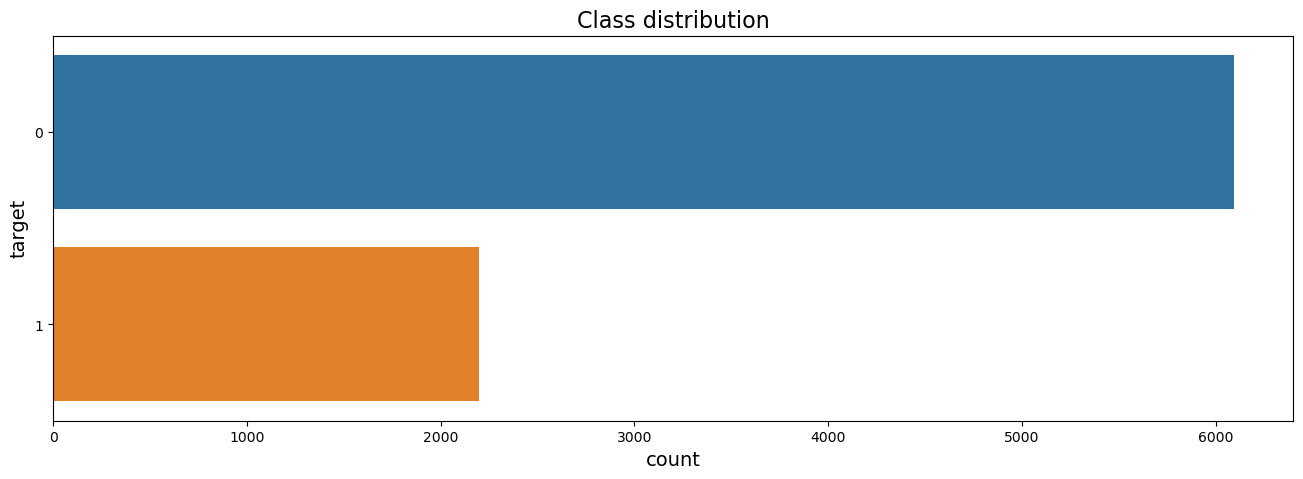

In [12]:
plt.figure(figsize=(16, 5))
sns.countplot(y=eda.groupby("customer_ID")["target"].max())
plt.title("Class distribution", fontsize=16)
plt.xlabel("count", fontsize=14)
plt.ylabel("target", fontsize=14);

### Null Values

In [14]:
eda.info(max_cols=200, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 191 columns):
 #    Column       Non-Null Count   Dtype  
---   ------       --------------   -----  
 0    customer_ID  100000 non-null  object 
 1    S_2          100000 non-null  object 
 2    P_2          99214 non-null   float64
 3    D_39         100000 non-null  float64
 4    B_1          100000 non-null  float64
 5    B_2          99963 non-null   float64
 6    R_1          100000 non-null  float64
 7    S_3          81374 non-null   float64
 8    D_41         99963 non-null   float64
 9    B_3          99963 non-null   float64
 10   D_42         14614 non-null   float64
 11   D_43         69805 non-null   float64
 12   D_44         94947 non-null   float64
 13   B_4          100000 non-null  float64
 14   D_45         99963 non-null   float64
 15   B_5          100000 non-null  float64
 16   R_2          100000 non-null  float64
 17   D_46         78158 non-null   float64
 18   D_4

In [15]:
null_hist = eda.isna().sum().div(len(eda)).mul(100).sort_values(ascending=False)

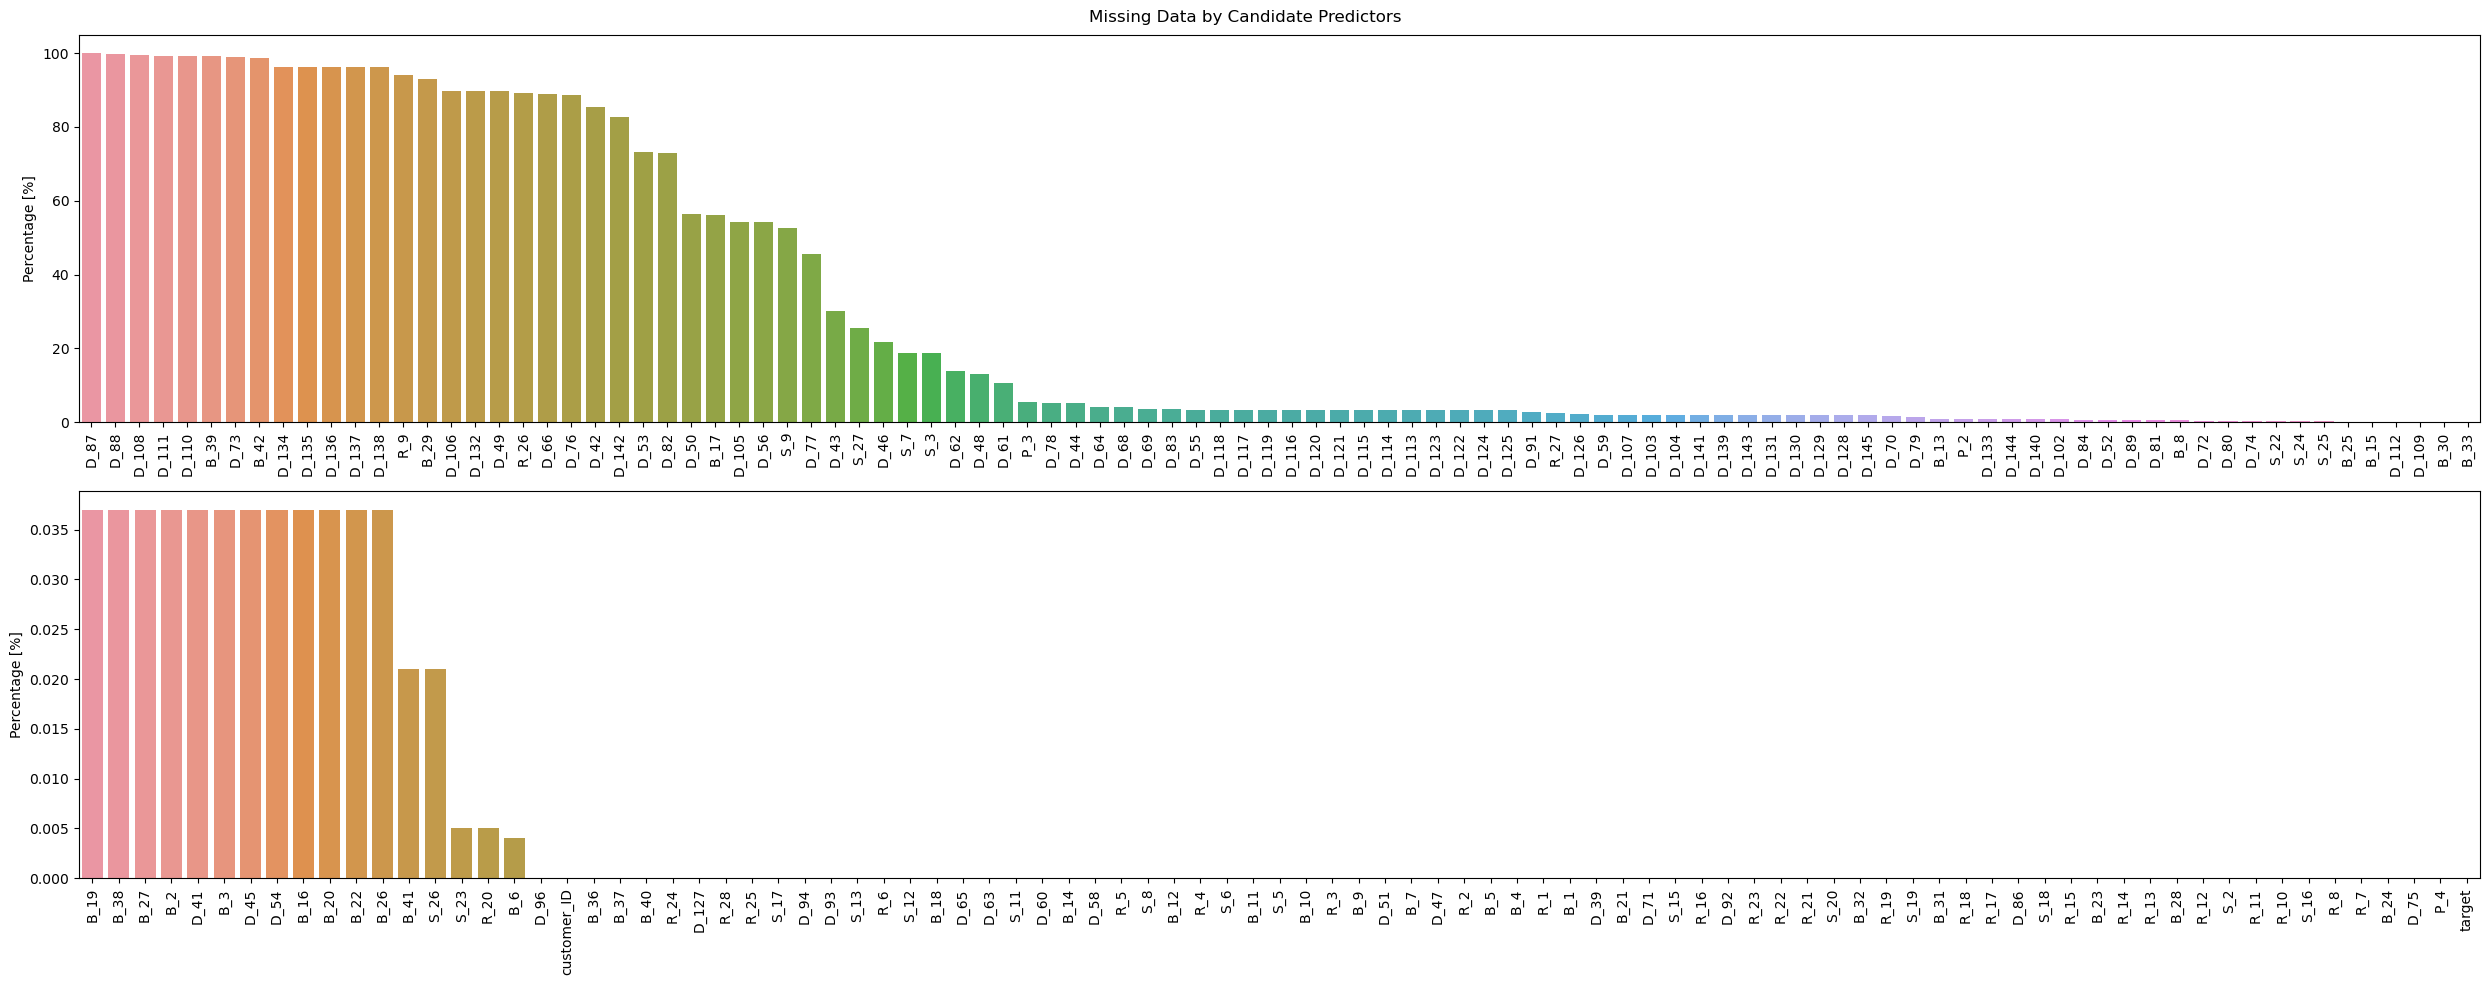

In [16]:
plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(2,1, figsize=(25,10))
sns.barplot(x=null_hist[:100].index, y=null_hist[:100].values, ax=ax[0])
sns.barplot(x=null_hist[100:].index, y=null_hist[100:].values, ax=ax[1])
ax[0].set_ylabel("Percentage [%]"), ax[1].set_ylabel("Percentage [%]")
ax[0].tick_params(axis='x', rotation=90); ax[1].tick_params(axis='x', rotation=90)
plt.suptitle("Missing Data by Candidate Predictors")
plt.tight_layout()
plt.savefig('figs/null_vars.png', dpi=425, bbox_inches='tight')
plt.show()

### Categorical Variables

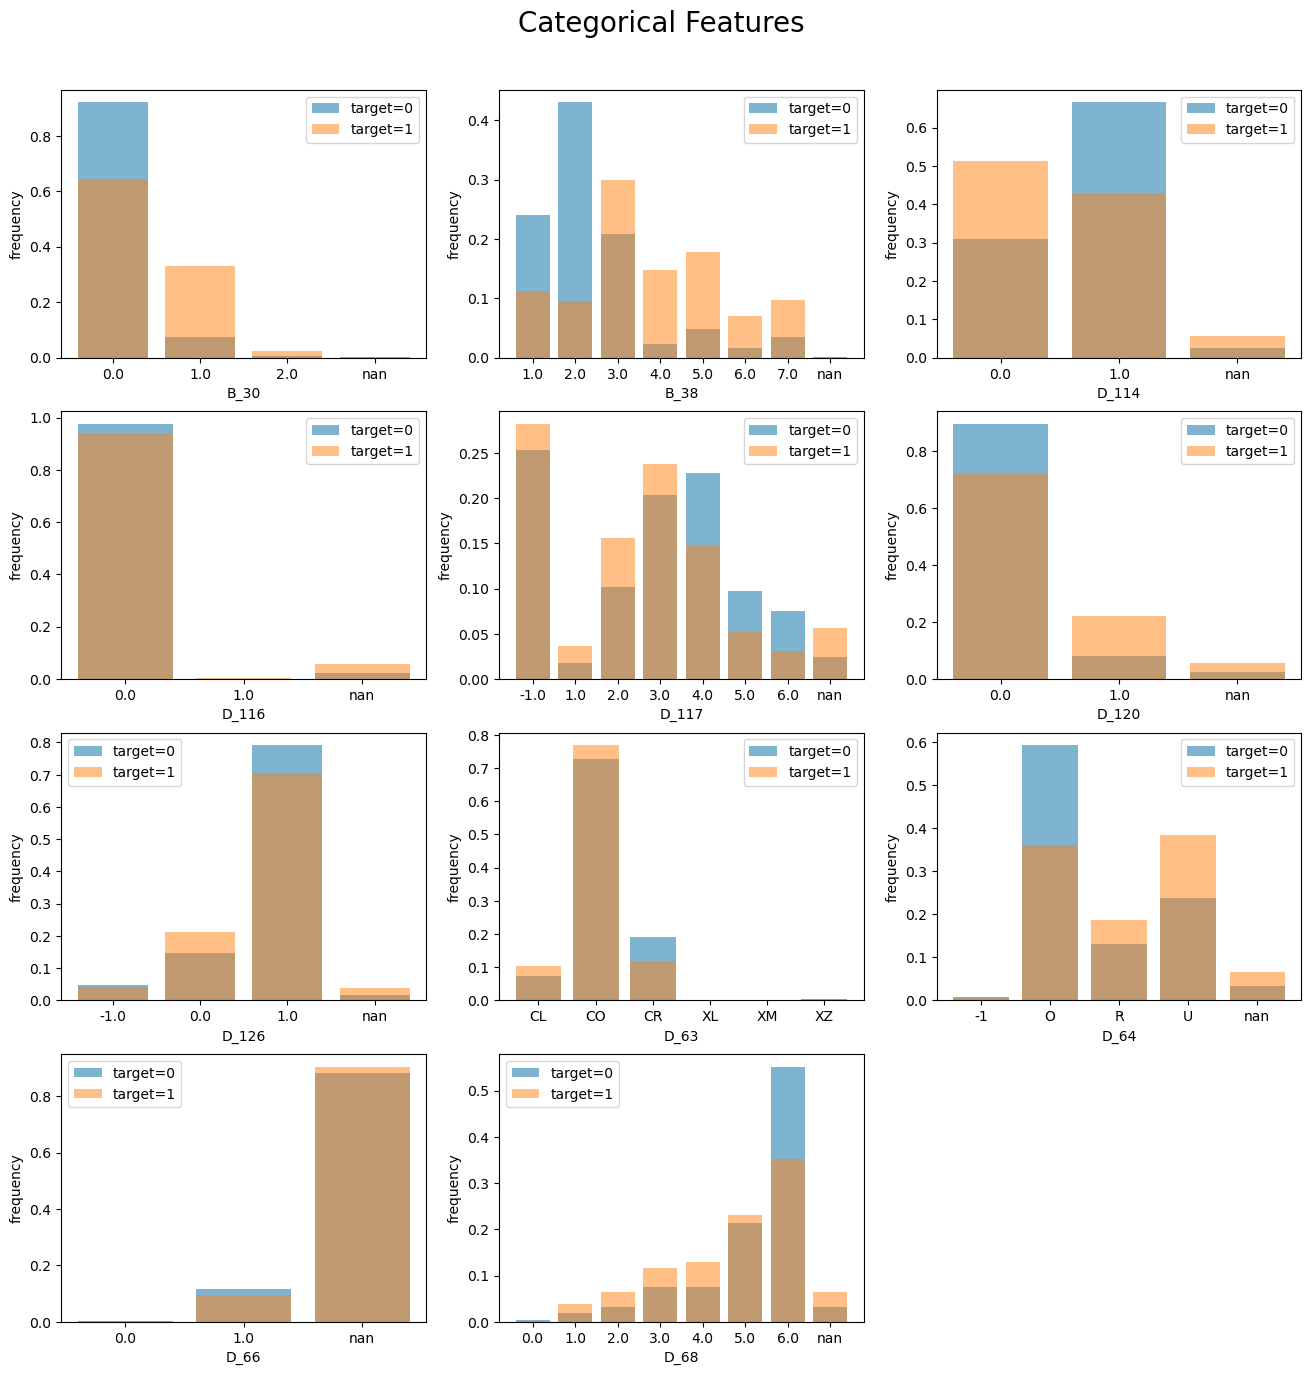

In [18]:
cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
plt.figure(figsize=(16, 16))
for i, f in enumerate(cat_features):
    plt.subplot(4, 3, i+1)
    temp = pd.DataFrame(eda[f][eda.target == 0].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=0')
    temp = pd.DataFrame(eda[f][eda.target == 1].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=1')
    plt.xlabel(f)
    plt.ylabel('frequency')
    plt.legend()
    plt.xticks(temp.index, temp.value)
plt.suptitle('Categorical Features', fontsize=20, y=0.93)
plt.savefig('figs/cat_vars.png', dpi=425, bbox_inches='tight')
plt.show()
del temp

### Continuous Variables

177


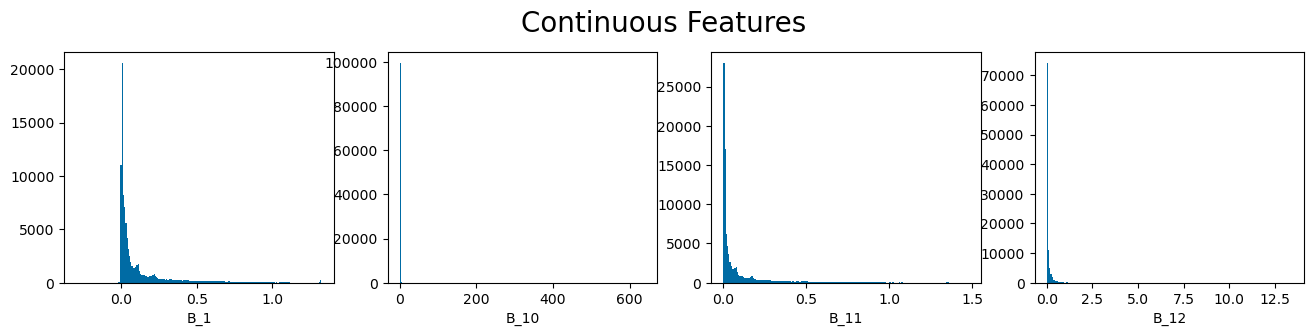

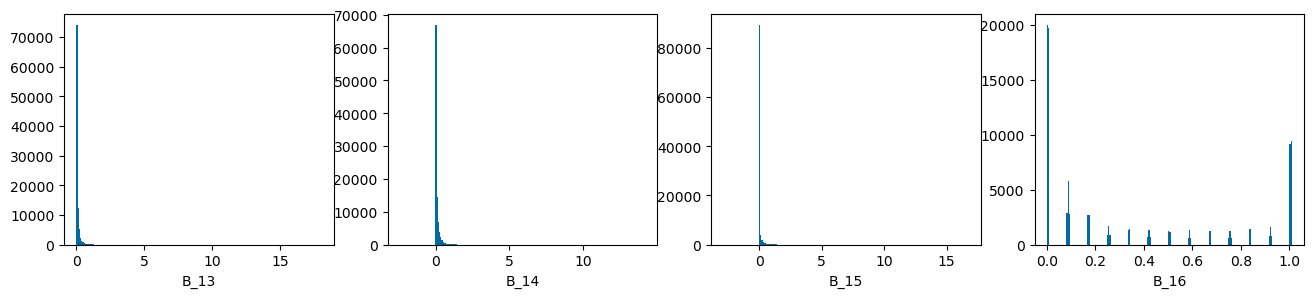

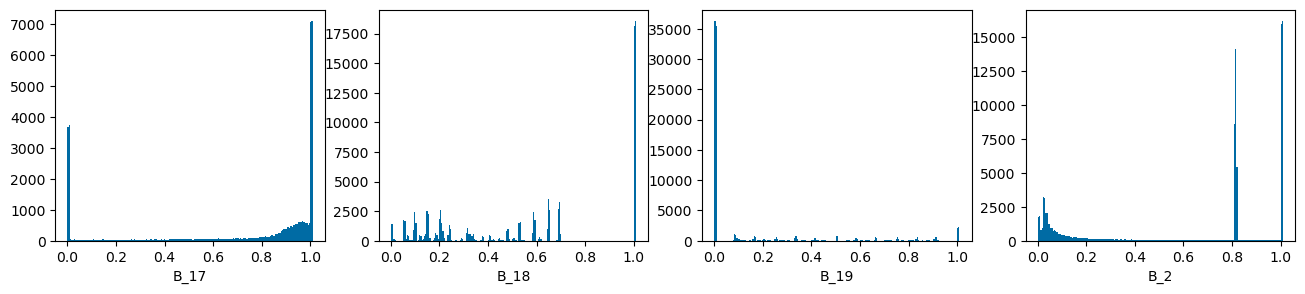

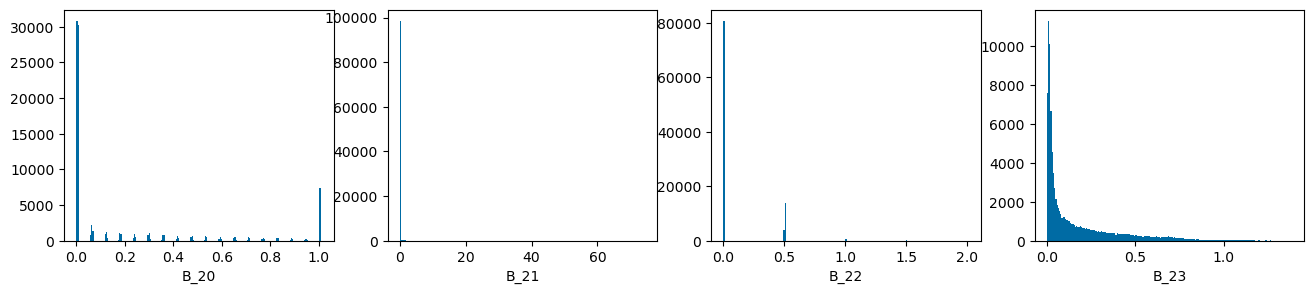

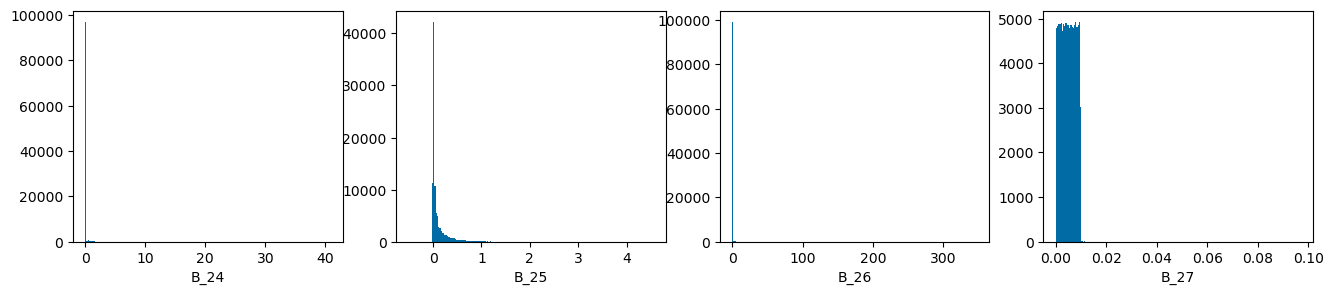

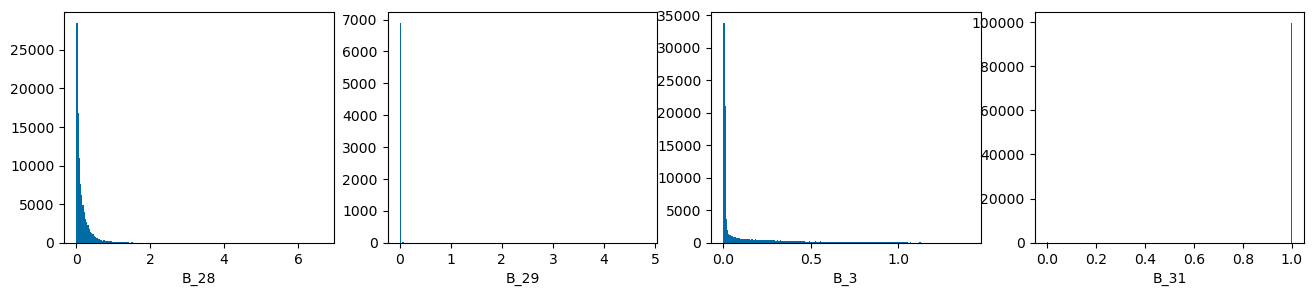

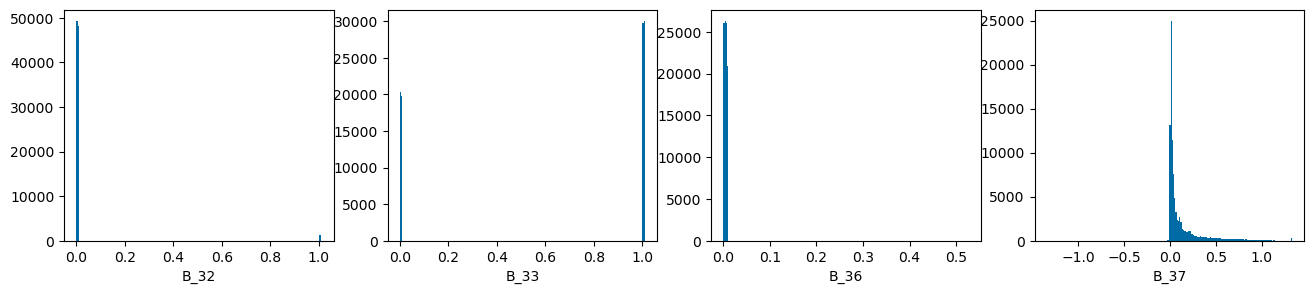

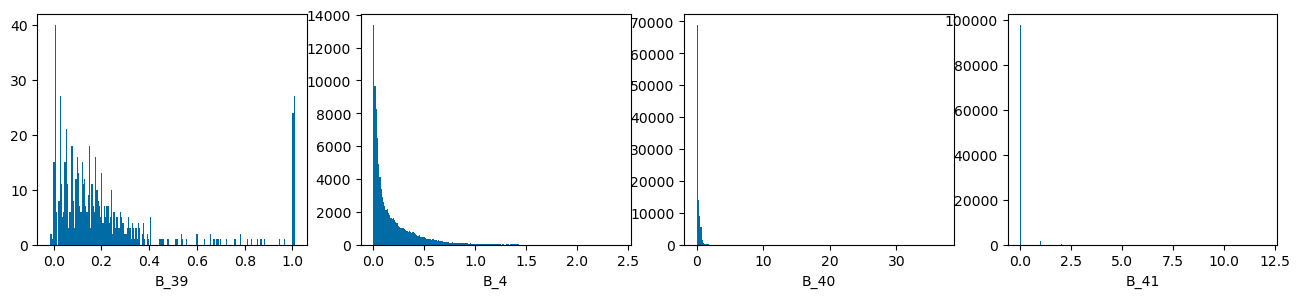

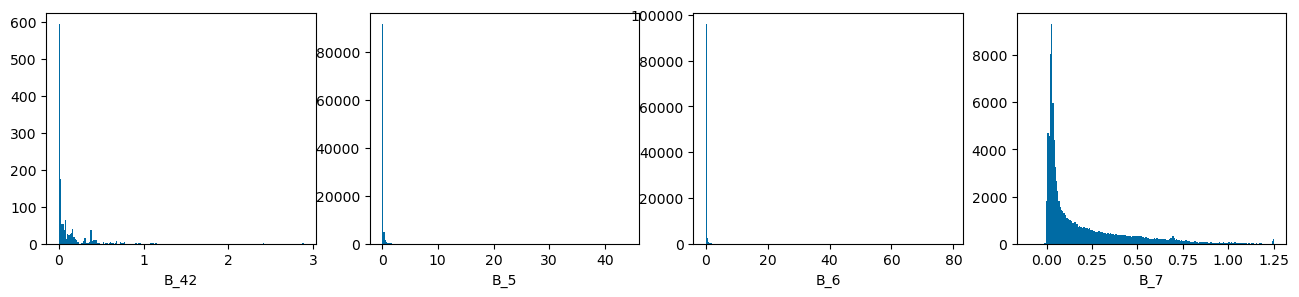

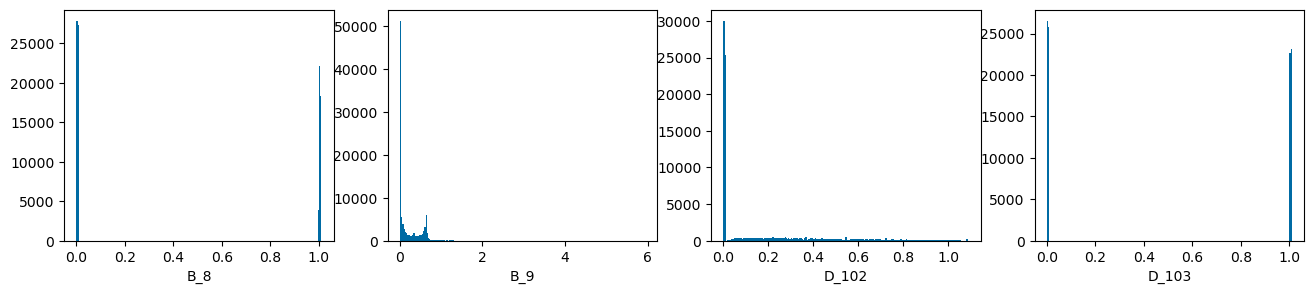

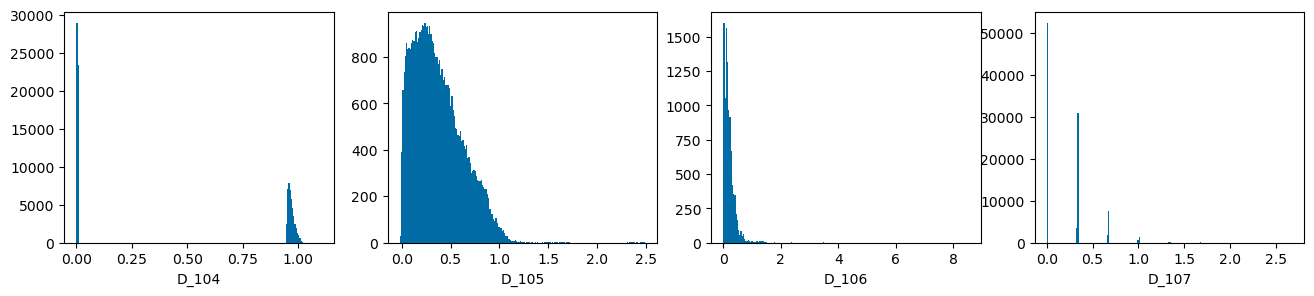

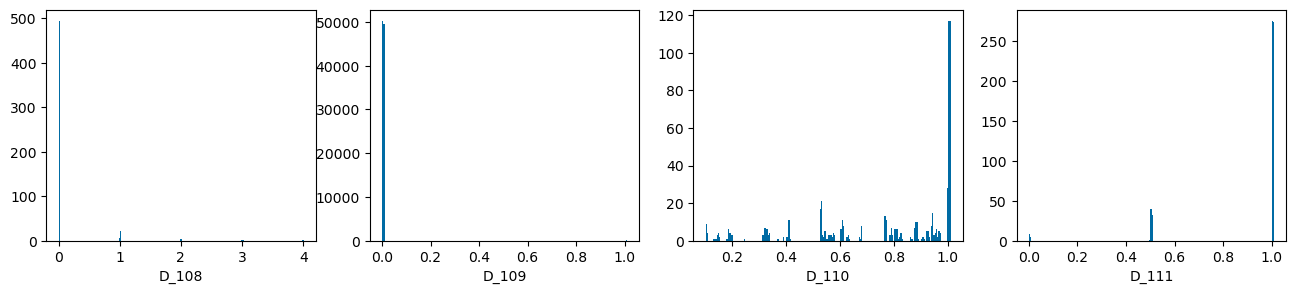

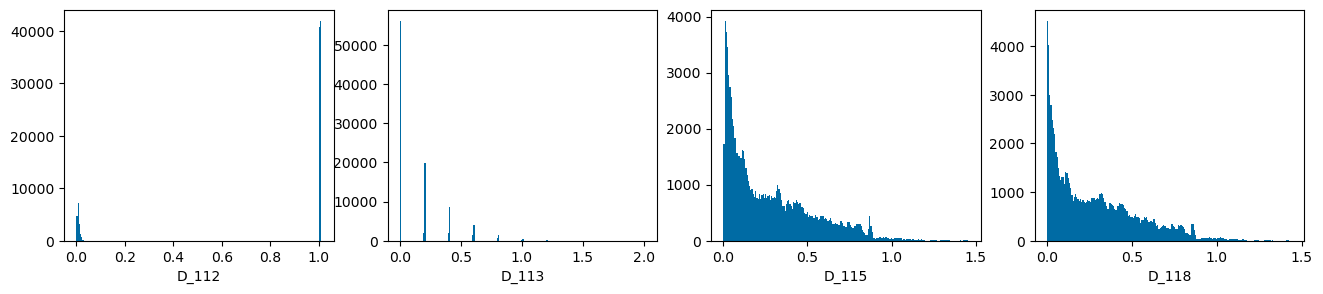

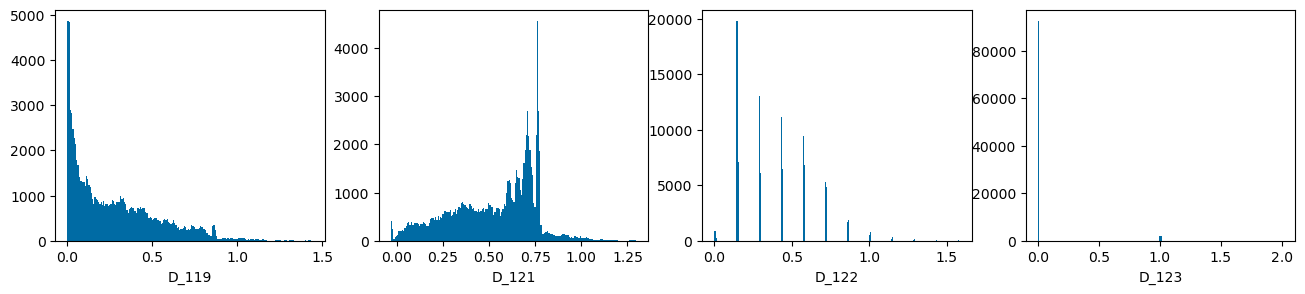

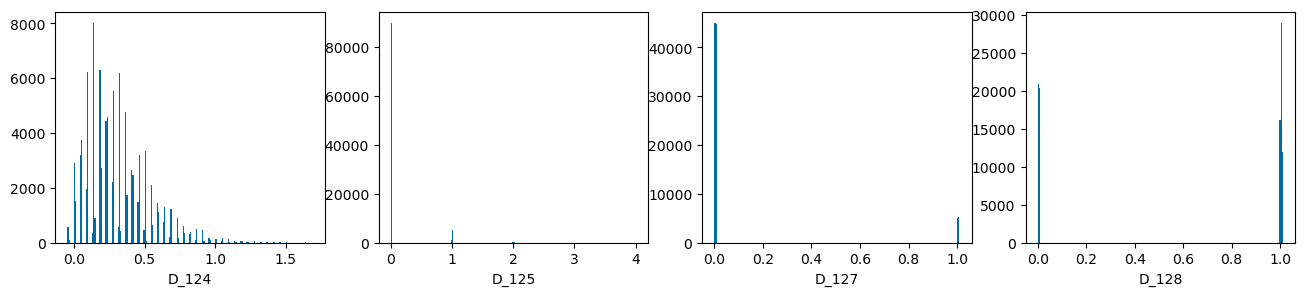

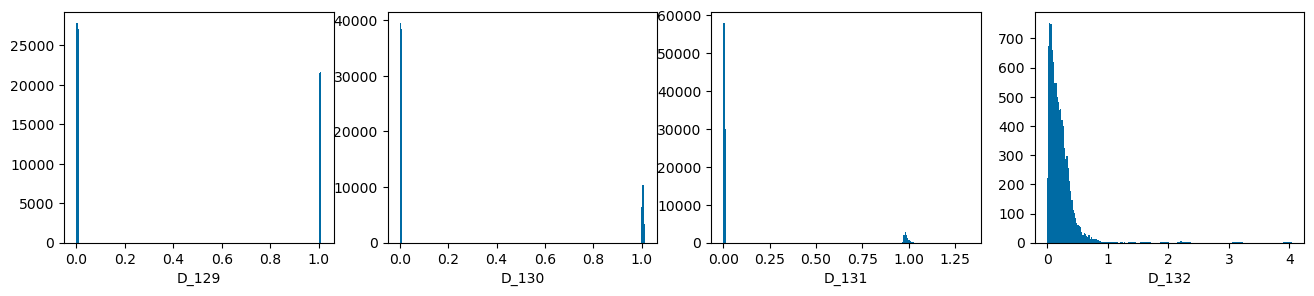

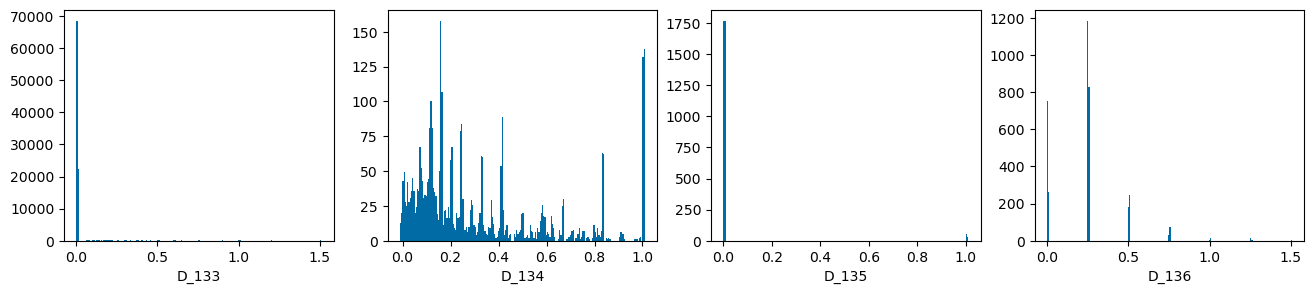

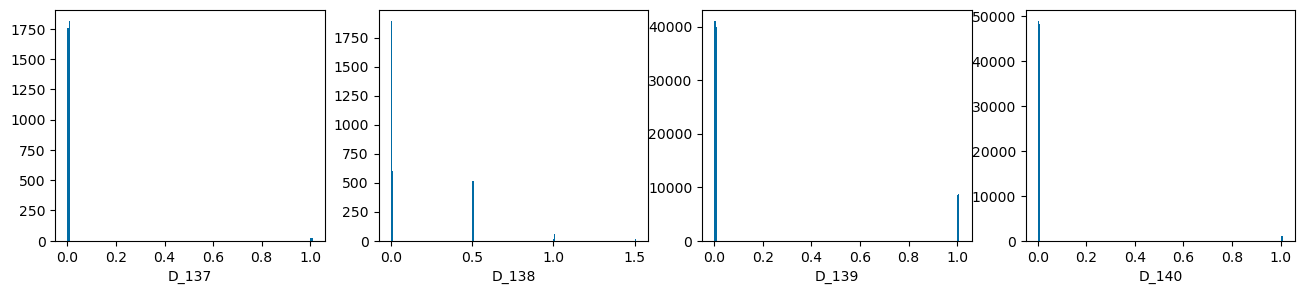

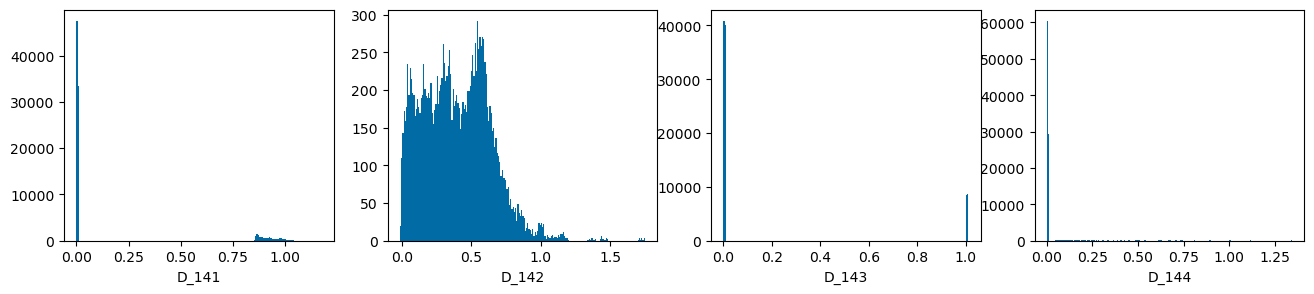

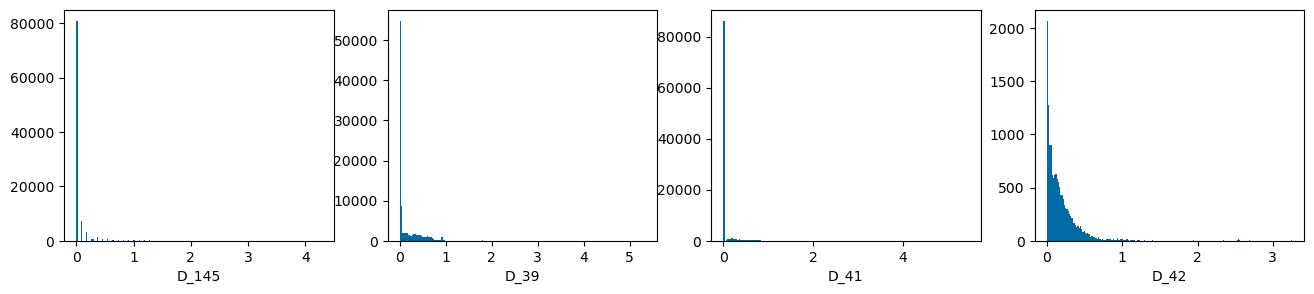

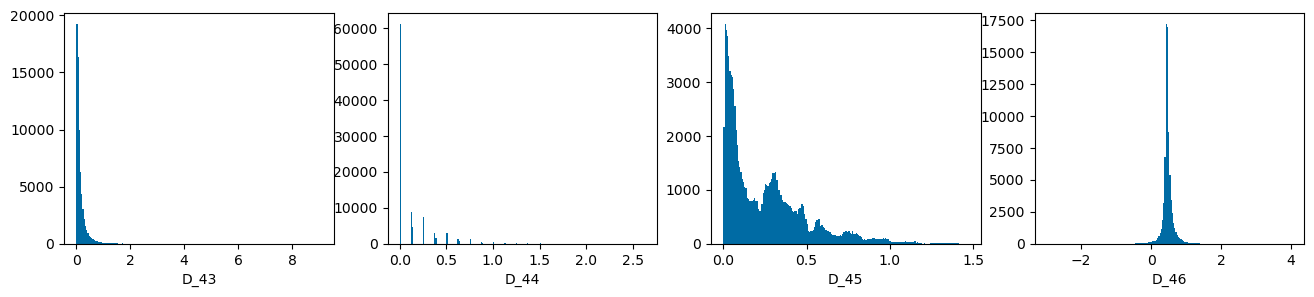

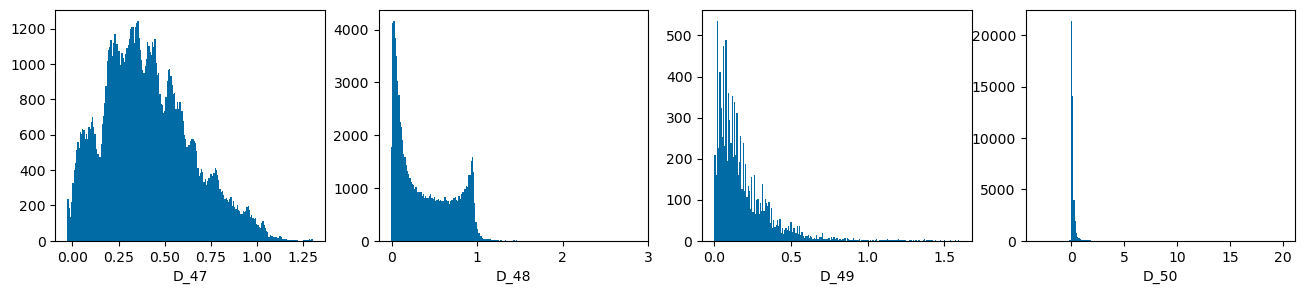

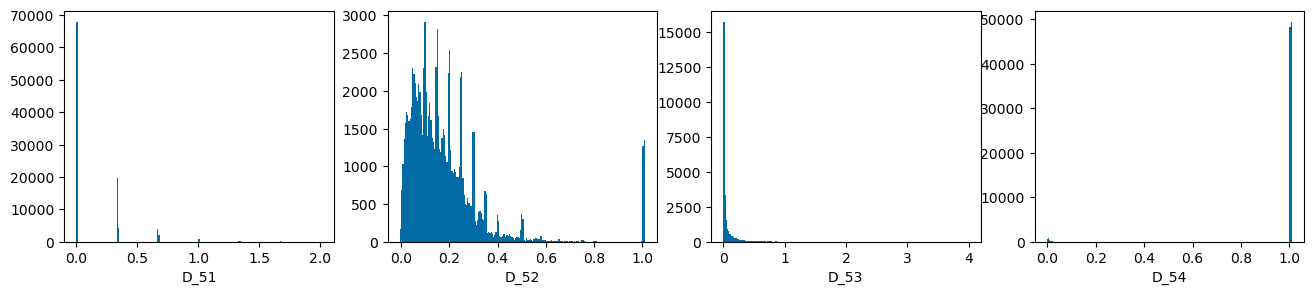

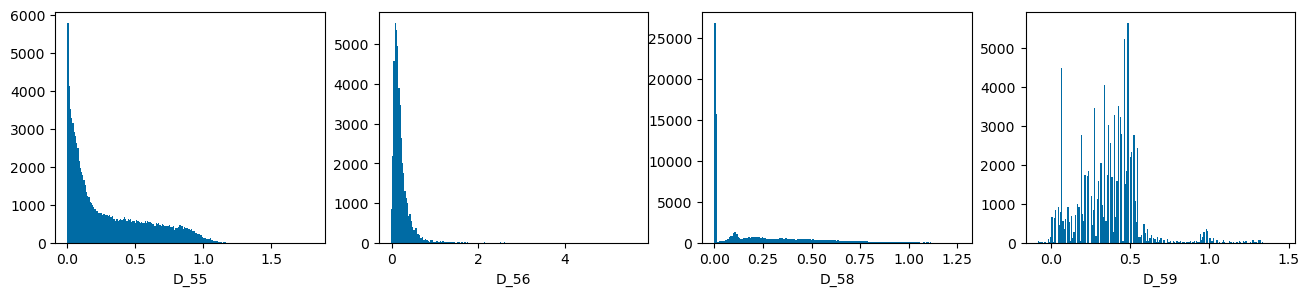

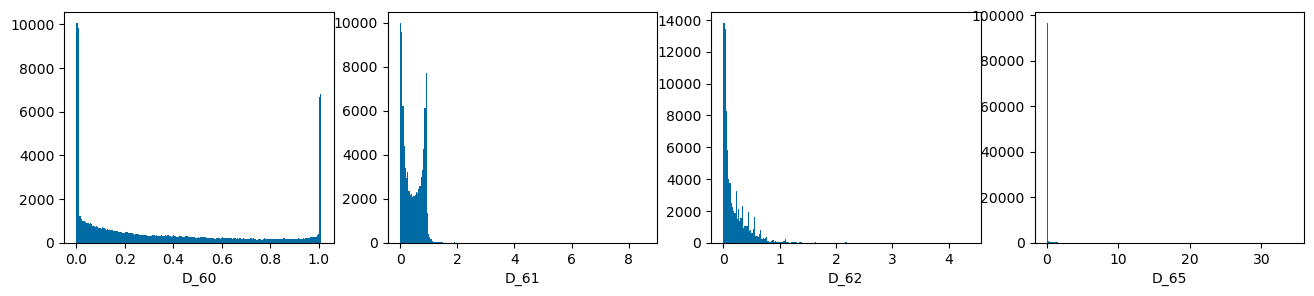

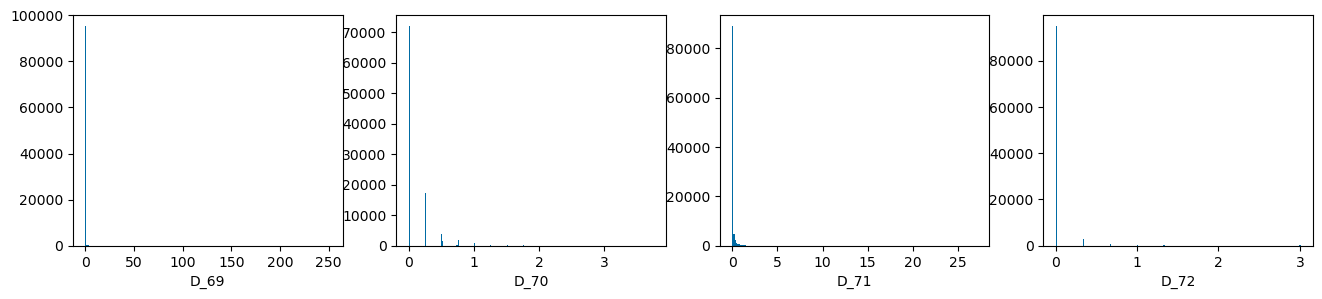

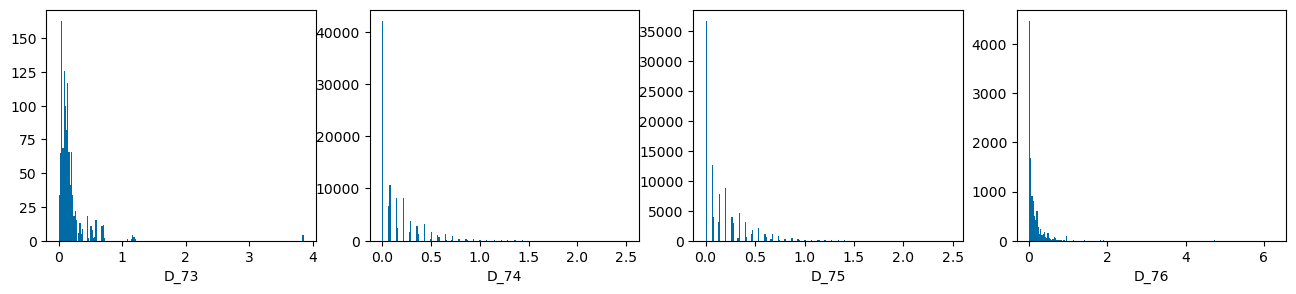

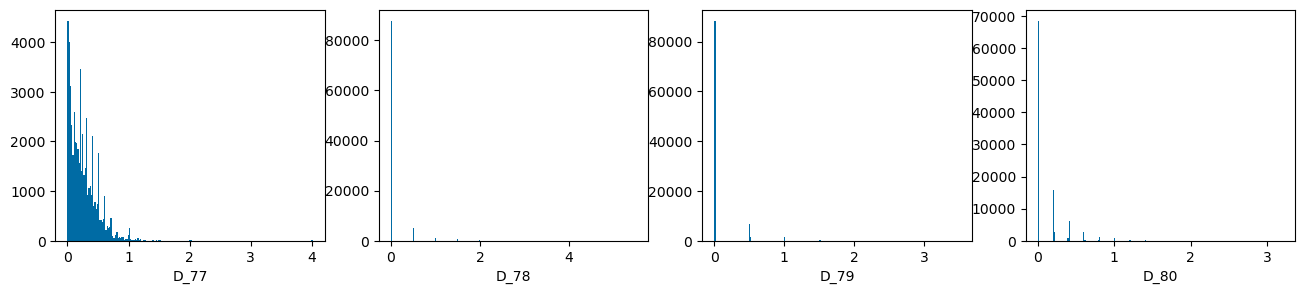

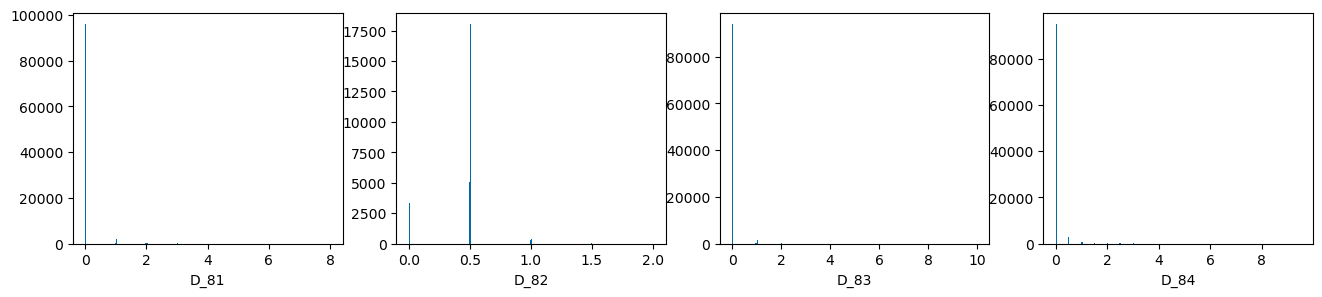

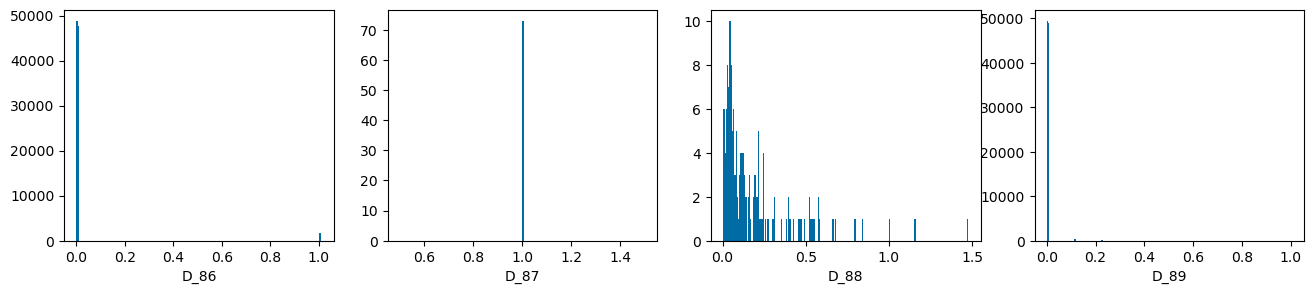

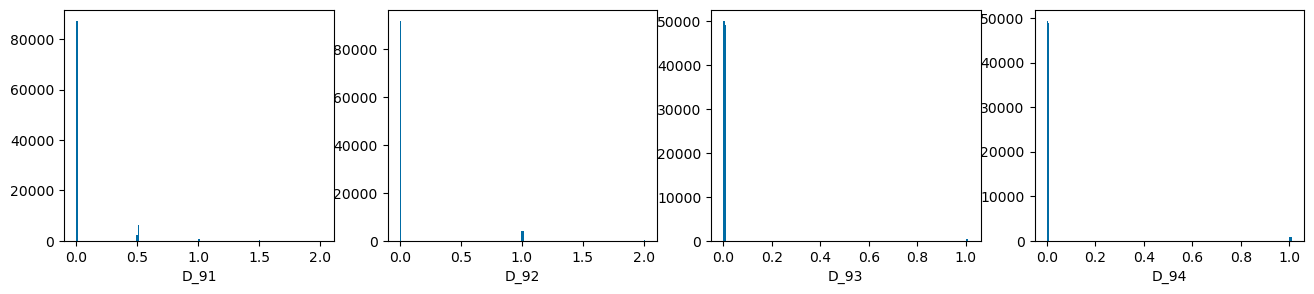

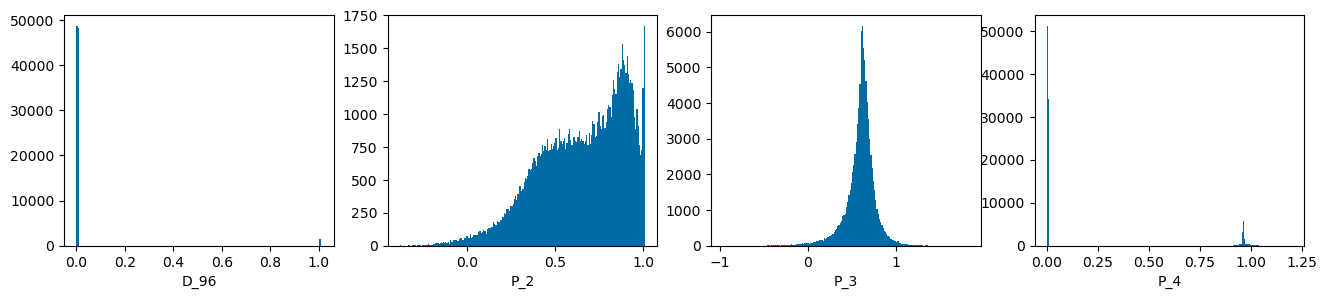

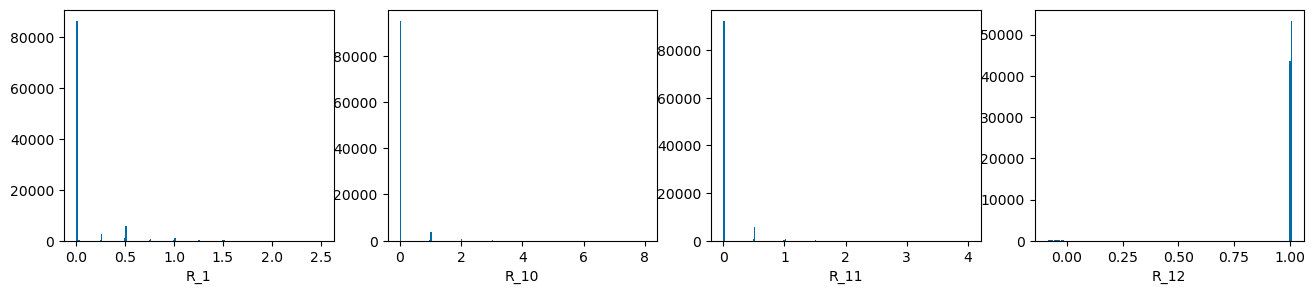

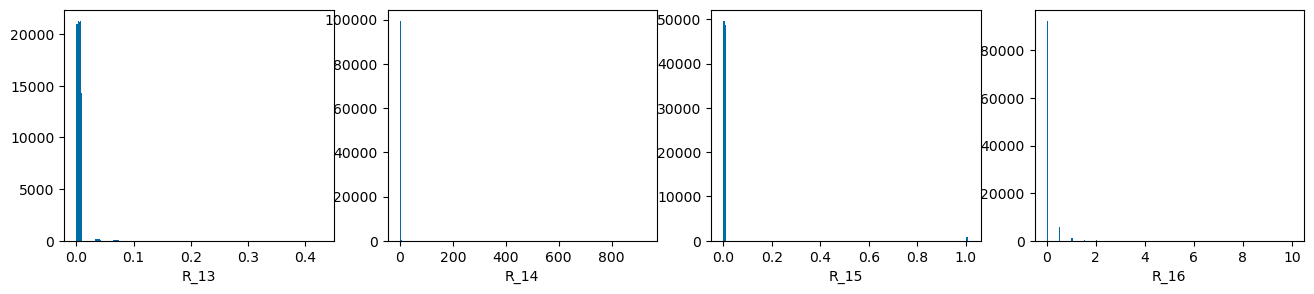

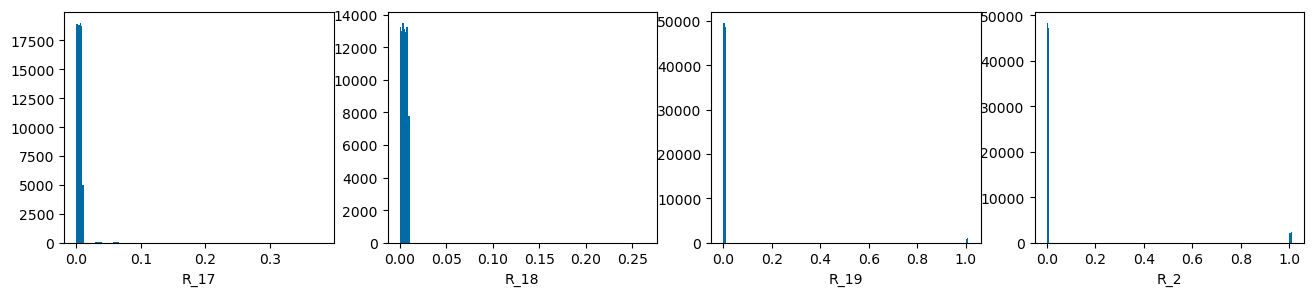

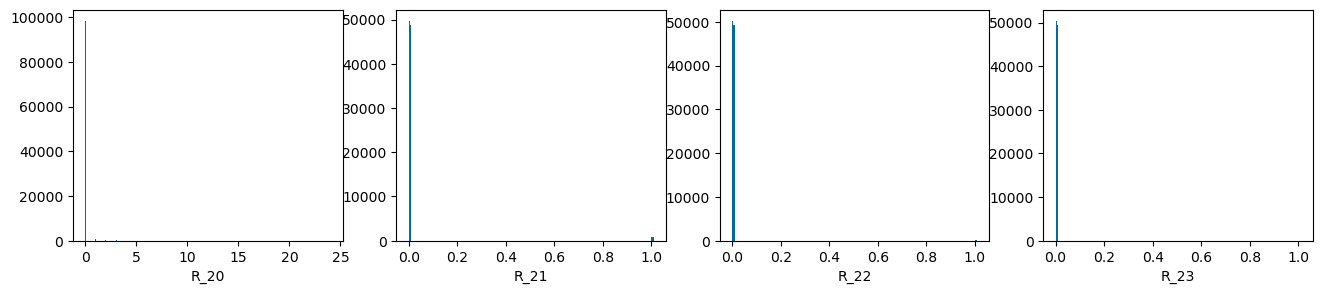

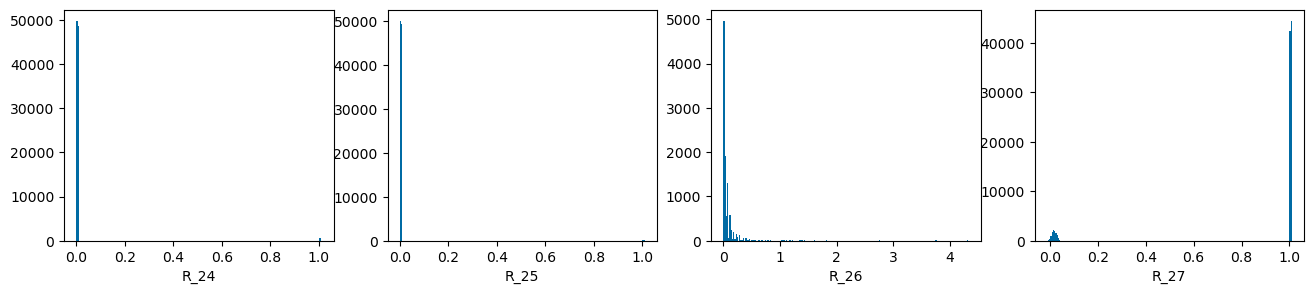

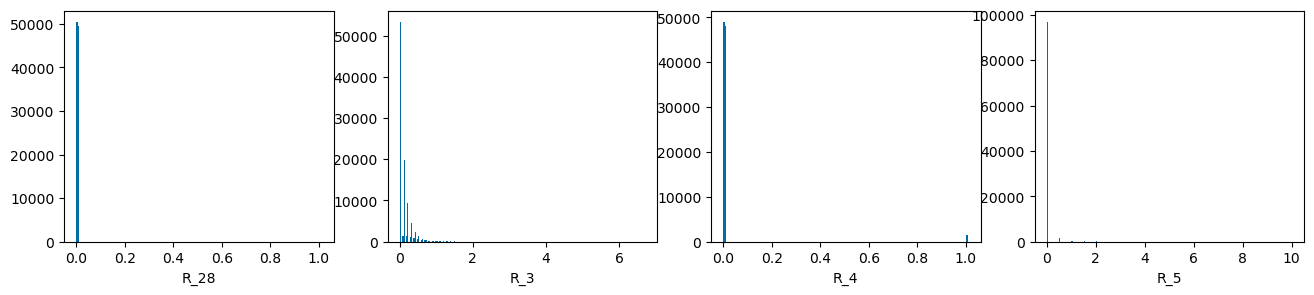

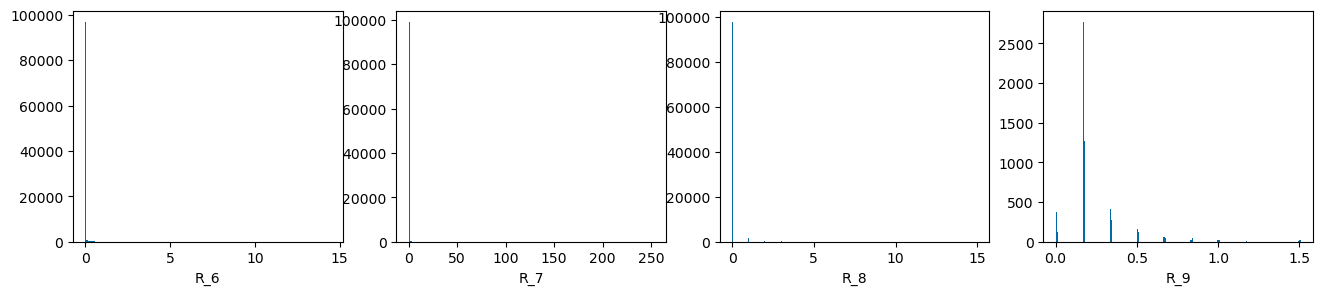

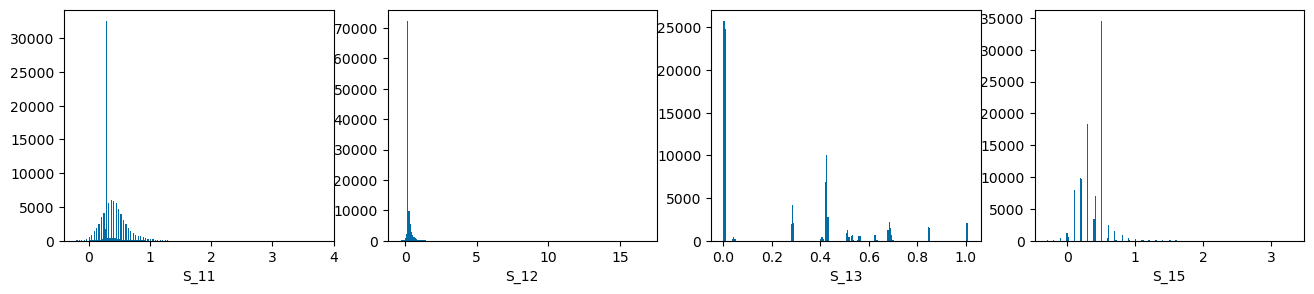

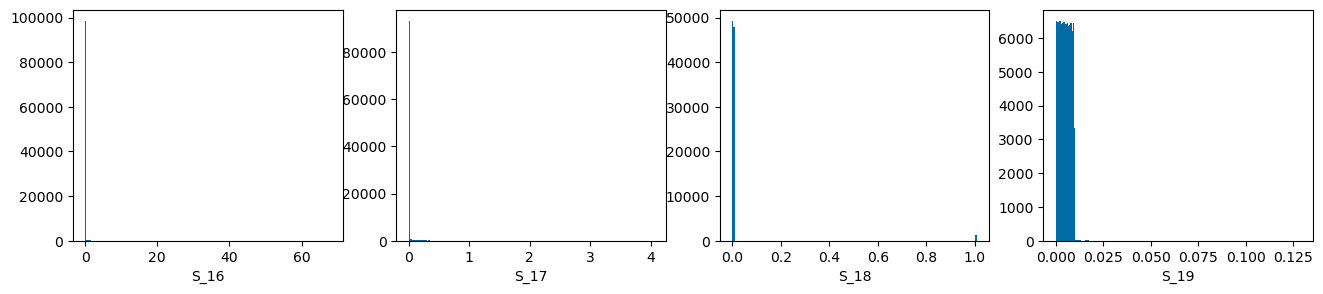

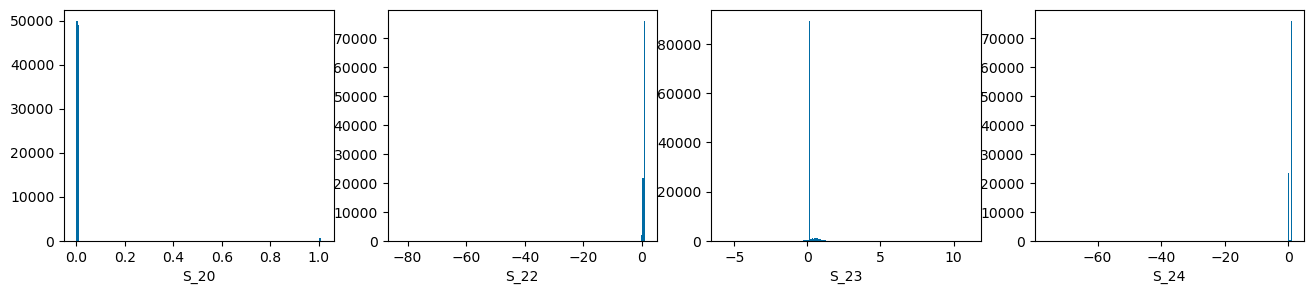

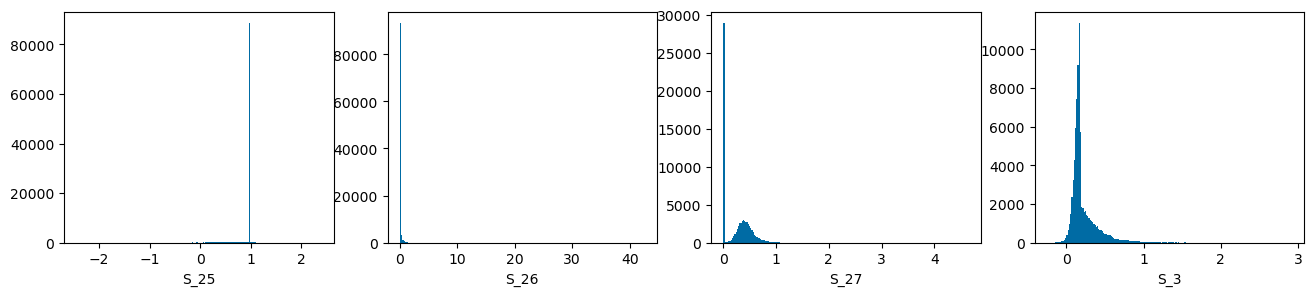

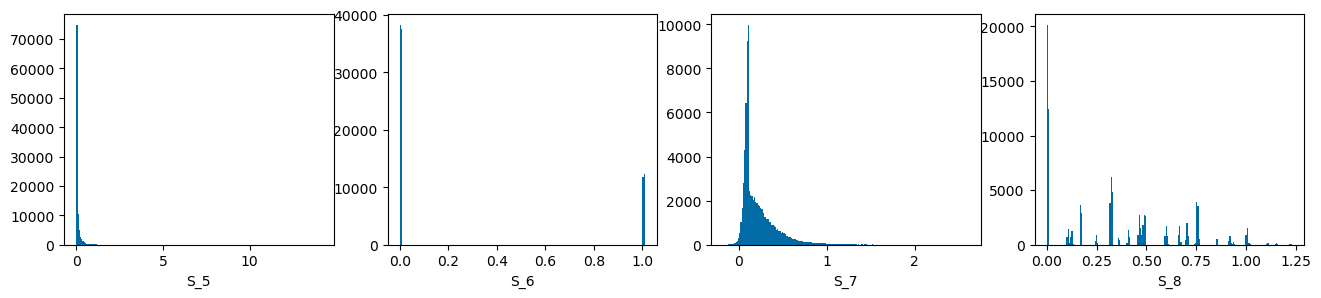

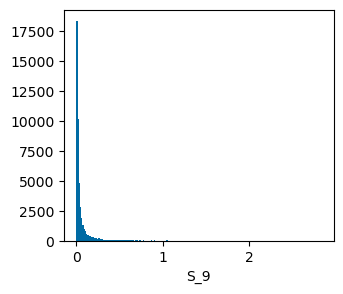

In [19]:
cont_features = sorted([f for f in eda.columns if f not in cat_features + ['customer_ID', 'target', 'S_2']])
print(len(cont_features))
# print(cont_features)
ncols = 4
for i, f in enumerate(cont_features):
    if i % ncols == 0: 
        if i > 0: plt.show()
        plt.figure(figsize=(16, 3))
        if i == 0: plt.suptitle('Continuous Features', fontsize=20, y=1.02)
    plt.subplot(1, ncols, i % ncols + 1)
    plt.hist(eda[f], bins=200)
    plt.xlabel(f)
plt.savefig('figs/cont_vars.png', dpi=425, bbox_inches='tight')
plt.show()

### Duration of Customer Data

In [20]:
customer = eda.groupby(['customer_ID','target']).size().reset_index().rename(columns={0:'months'})
customer.head()

,customer_ID,target,months
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,13
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,13
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,13
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,13
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,13


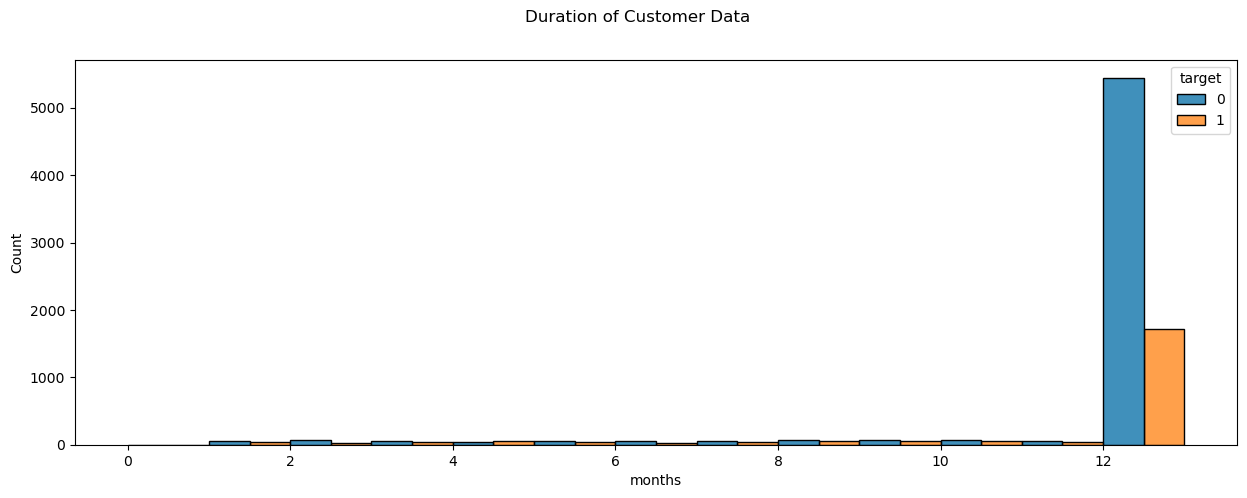

In [21]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
sns.histplot(x='months', data=customer, hue='target', stat='count', multiple="dodge", bins=np.arange(0,14), ax=ax)
# ax.bar_label(ax.containers[0], fmt='%.f%%')
# ax.bar_label(ax.containers[1], fmt='%.f%%')
plt.suptitle("Duration of Customer Data")
plt.savefig('figs/customer.png', dpi=425, bbox_inches='tight')
plt.show()

In [22]:
pickle.dump(eda, open("pickle/eda.pkl", "wb"))
pickle.dump(null_hist, open("pickle/nulls.pkl", "wb"))
pickle.dump(cat_features, open("pickle/cat_features.pkl", "wb"))

 
 ***
 

<h2><center>FEATURE SELECTION</center></h2>

During EDA, we saw that most of the candidate predictor variables contained < 10% null values. We decided to remove the variables with > 10% null values; the bulk of the variables we are removing are > 90% null values.

In [23]:
test = pd.DataFrame(eda.isna().sum())

In [24]:
test.reset_index()

,index,0
0,customer_ID,0
1,S_2,0
2,P_2,786
3,D_39,0
4,B_1,0
...,...,...
186,D_142,82728
187,D_143,1813
188,D_144,733
189,D_145,1813


In [25]:
df = test.rename(columns={0: "index", 1: "null_ct"}).reset_index()

In [26]:
df

,level_0,index
0,customer_ID,0
1,S_2,0
2,P_2,786
3,D_39,0
4,B_1,0
...,...,...
186,D_142,82728
187,D_143,1813
188,D_144,733
189,D_145,1813


In [27]:
# make dynamic, change divisor when bigger DS
df['null_pct'] = df['index']/100000 * 100

In [28]:
df

,level_0,index,null_pct
0,customer_ID,0,0.000
1,S_2,0,0.000
2,P_2,786,0.786
3,D_39,0,0.000
4,B_1,0,0.000
...,...,...,...
186,D_142,82728,82.728
187,D_143,1813,1.813
188,D_144,733,0.733
189,D_145,1813,1.813


In [29]:
fs_vars = df[df['null_pct'] > 10]

In [93]:
fs_vars.head()

,level_0,index,null_pct
7,S_3,18626,18.626
10,D_42,85386,85.386
11,D_43,30195,30.195
17,D_46,21842,21.842
19,D_48,12915,12.915


In [97]:
fsv = list(fs_vars['level_0'])
fsv[0:15]

['S_3',
 'D_42',
 'D_43',
 'D_46',
 'D_48',
 'D_49',
 'D_50',
 'D_53',
 'S_7',
 'D_56',
 'S_9',
 'D_61',
 'D_62',
 'B_17',
 'D_66']

In [98]:
# list of variables we do want
new_v = sorted([f for f in eda.columns if f not in fsv])
new_v[0:15]

['B_1',
 'B_10',
 'B_11',
 'B_12',
 'B_13',
 'B_14',
 'B_15',
 'B_16',
 'B_18',
 'B_19',
 'B_2',
 'B_20',
 'B_21',
 'B_22',
 'B_23']

In [33]:
fs = eda[new_v].copy()

In [34]:
fs

,B_1,B_10,B_11,B_12,B_13,B_14,B_15,B_16,B_18,B_19,...,S_22,S_23,S_24,S_25,S_26,S_5,S_6,S_8,customer_ID,target
0,0.008724,0.096219,0.002768,0.148266,0.118075,0.018385,0.016361,0.007665,0.652984,0.008520,...,0.894090,0.135561,0.911191,0.974539,0.001243,0.023381,0.008322,0.922998,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,0.004923,0.099804,0.002749,0.143530,0.118737,0.013035,0.017688,0.007148,0.647093,0.002238,...,0.902135,0.136333,0.919876,0.975624,0.004561,0.030599,0.002482,0.919414,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
2,0.021655,0.134073,0.010077,0.137014,0.114534,0.056653,0.063955,0.003636,0.645819,0.000408,...,0.939654,0.134938,0.958699,0.974067,0.011736,0.048367,0.000530,1.001977,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
3,0.013683,0.134437,0.009667,0.129017,0.120740,0.012498,0.022732,0.005896,0.654358,0.005897,...,0.913205,0.140058,0.926341,0.975499,0.007571,0.030063,0.000783,0.704016,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
4,0.015193,0.121518,0.009484,0.129539,0.095178,0.027897,0.031171,0.001714,0.650112,0.007773,...,0.921026,0.131620,0.933479,0.978027,0.018200,0.054221,0.006698,0.917133,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.597829,0.018762,0.568745,0.019354,0.008020,0.208935,0.003641,1.007979,0.058000,0.832152,...,0.927312,0.136109,0.934297,0.973335,0.008895,0.003671,1.003519,0.664955,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,0
99996,0.675999,0.008919,0.644104,0.015428,0.036452,0.205724,0.004038,1.002550,0.052252,0.915952,...,0.927598,0.139274,0.934902,0.975162,0.003994,0.004589,0.009121,0.004212,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,0
99997,0.645728,0.018506,0.621671,0.015932,0.029023,0.202970,0.007950,1.006372,0.060085,1.003033,...,0.923396,0.137267,0.932529,0.972051,0.005734,0.005730,0.009046,0.007804,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,0
99998,0.008019,0.016049,0.000656,0.009107,0.007334,0.004305,0.001346,0.172072,0.585668,0.007399,...,0.296741,0.135450,0.080604,0.969829,0.001976,0.001485,1.009798,0.009353,049e0948e285ec6767bf07e6e3f5e0919821ee200e359d...,0


In [35]:
null_test = fs.isna().sum().div(len(eda)).mul(100).sort_values(ascending=False)

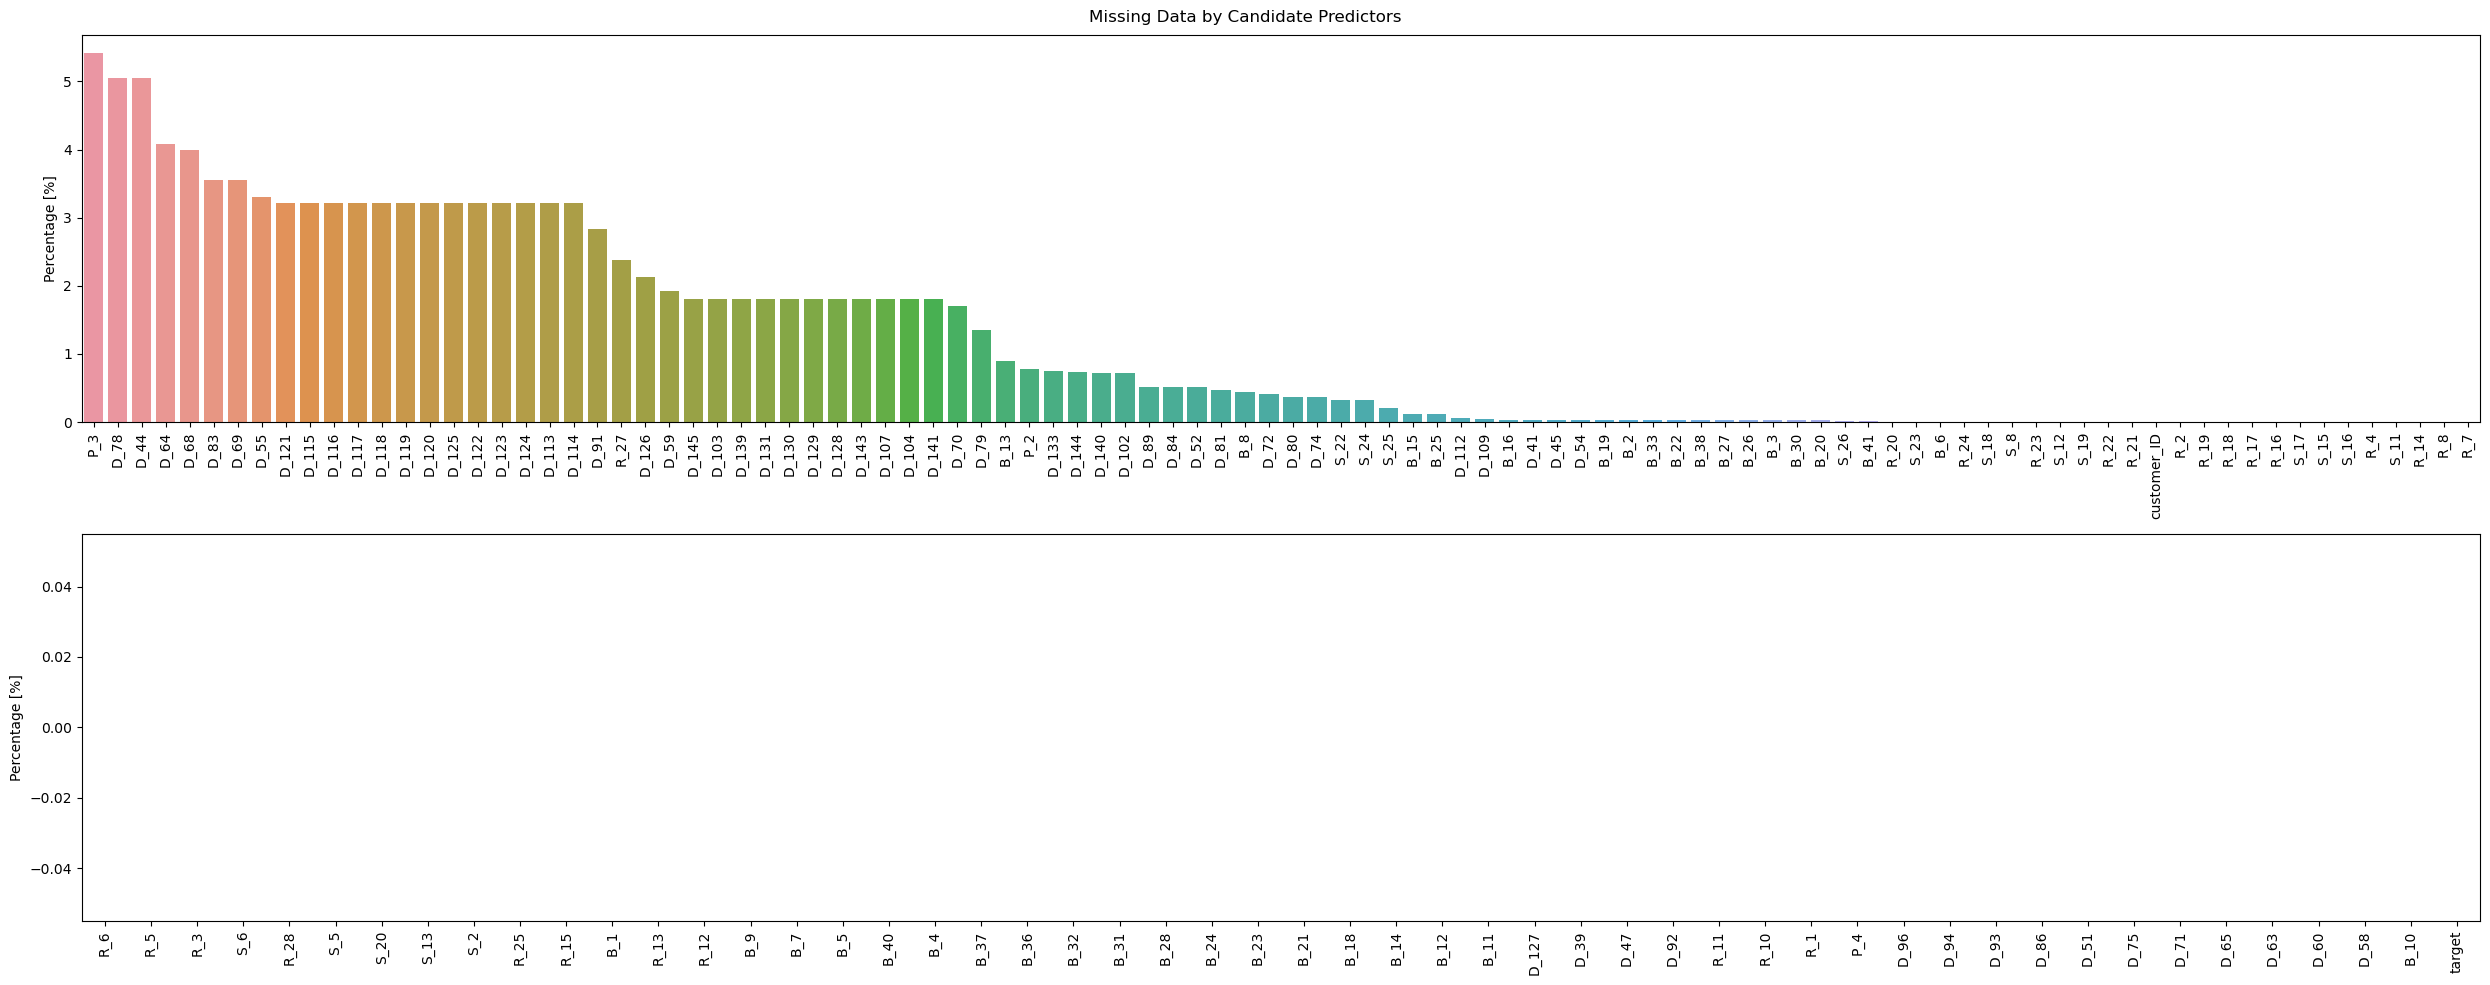

In [36]:
plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(2,1, figsize=(25,10))
sns.barplot(x=null_test[:100].index, y=null_test[:100].values, ax=ax[0])
sns.barplot(x=null_test[100:].index, y=null_test[100:].values, ax=ax[1])
ax[0].set_ylabel("Percentage [%]"), ax[1].set_ylabel("Percentage [%]")
ax[0].tick_params(axis='x', rotation=90); ax[1].tick_params(axis='x', rotation=90)
plt.suptitle("Missing Data by Candidate Predictors")
plt.tight_layout()
plt.savefig('figs/null_test1.png', dpi=425, bbox_inches='tight')
plt.show()

In [37]:
pickle.dump(fs, open("pickle/fs_df.pkl", "wb"))

In [38]:
fs = pickle.load(open("pickle/fs_df.pkl", "rb"))

### Feature Engineering

In order to use Scikitlearn PCA, we will drop the categorical variables as well as `S_2`, which is a date/time variable. these will be evaluated separately.

In [39]:
cat_features

['B_30',
 'B_38',
 'D_114',
 'D_116',
 'D_117',
 'D_120',
 'D_126',
 'D_63',
 'D_64',
 'D_66',
 'D_68']

In [99]:
fs_new = sorted([f for f in fs.columns if f not in cat_features + ['customer_ID','S_2']])
fs_new[0:15]

['B_1',
 'B_10',
 'B_11',
 'B_12',
 'B_13',
 'B_14',
 'B_15',
 'B_16',
 'B_18',
 'B_19',
 'B_2',
 'B_20',
 'B_21',
 'B_22',
 'B_23']

In [41]:
fs2 = fs[fs_new].copy()

In [42]:
fs2
# this is what we will use for stepwise selection after imputing NaNs

,B_1,B_10,B_11,B_12,B_13,B_14,B_15,B_16,B_18,B_19,...,S_20,S_22,S_23,S_24,S_25,S_26,S_5,S_6,S_8,target
0,0.008724,0.096219,0.002768,0.148266,0.118075,0.018385,0.016361,0.007665,0.652984,0.008520,...,0.009705,0.894090,0.135561,0.911191,0.974539,0.001243,0.023381,0.008322,0.922998,0
1,0.004923,0.099804,0.002749,0.143530,0.118737,0.013035,0.017688,0.007148,0.647093,0.002238,...,0.009924,0.902135,0.136333,0.919876,0.975624,0.004561,0.030599,0.002482,0.919414,0
2,0.021655,0.134073,0.010077,0.137014,0.114534,0.056653,0.063955,0.003636,0.645819,0.000408,...,0.008446,0.939654,0.134938,0.958699,0.974067,0.011736,0.048367,0.000530,1.001977,0
3,0.013683,0.134437,0.009667,0.129017,0.120740,0.012498,0.022732,0.005896,0.654358,0.005897,...,0.006614,0.913205,0.140058,0.926341,0.975499,0.007571,0.030063,0.000783,0.704016,0
4,0.015193,0.121518,0.009484,0.129539,0.095178,0.027897,0.031171,0.001714,0.650112,0.007773,...,0.005511,0.921026,0.131620,0.933479,0.978027,0.018200,0.054221,0.006698,0.917133,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.597829,0.018762,0.568745,0.019354,0.008020,0.208935,0.003641,1.007979,0.058000,0.832152,...,0.002984,0.927312,0.136109,0.934297,0.973335,0.008895,0.003671,1.003519,0.664955,0
99996,0.675999,0.008919,0.644104,0.015428,0.036452,0.205724,0.004038,1.002550,0.052252,0.915952,...,0.002146,0.927598,0.139274,0.934902,0.975162,0.003994,0.004589,0.009121,0.004212,0
99997,0.645728,0.018506,0.621671,0.015932,0.029023,0.202970,0.007950,1.006372,0.060085,1.003033,...,0.002412,0.923396,0.137267,0.932529,0.972051,0.005734,0.005730,0.009046,0.007804,0
99998,0.008019,0.016049,0.000656,0.009107,0.007334,0.004305,0.001346,0.172072,0.585668,0.007399,...,0.006557,0.296741,0.135450,0.080604,0.969829,0.001976,0.001485,1.009798,0.009353,0


In [44]:
pickle.dump(fs2, open('data/fs2.pkl', 'wb'))
# fs2 = pickle.load(open('data/fs2.pkl', 'rb'))

In [45]:
ss = fs2.fillna(fs2.mean())

In [46]:
pickle.dump(ss, open('data/ss_imputed.pkl', 'wb'))
# ss = pickle.load(open('data/ss_imputed.pkl', 'rb'))

In [47]:
np.any(np.isnan(ss))

False

In [48]:
np.all(np.isfinite(ss))

True

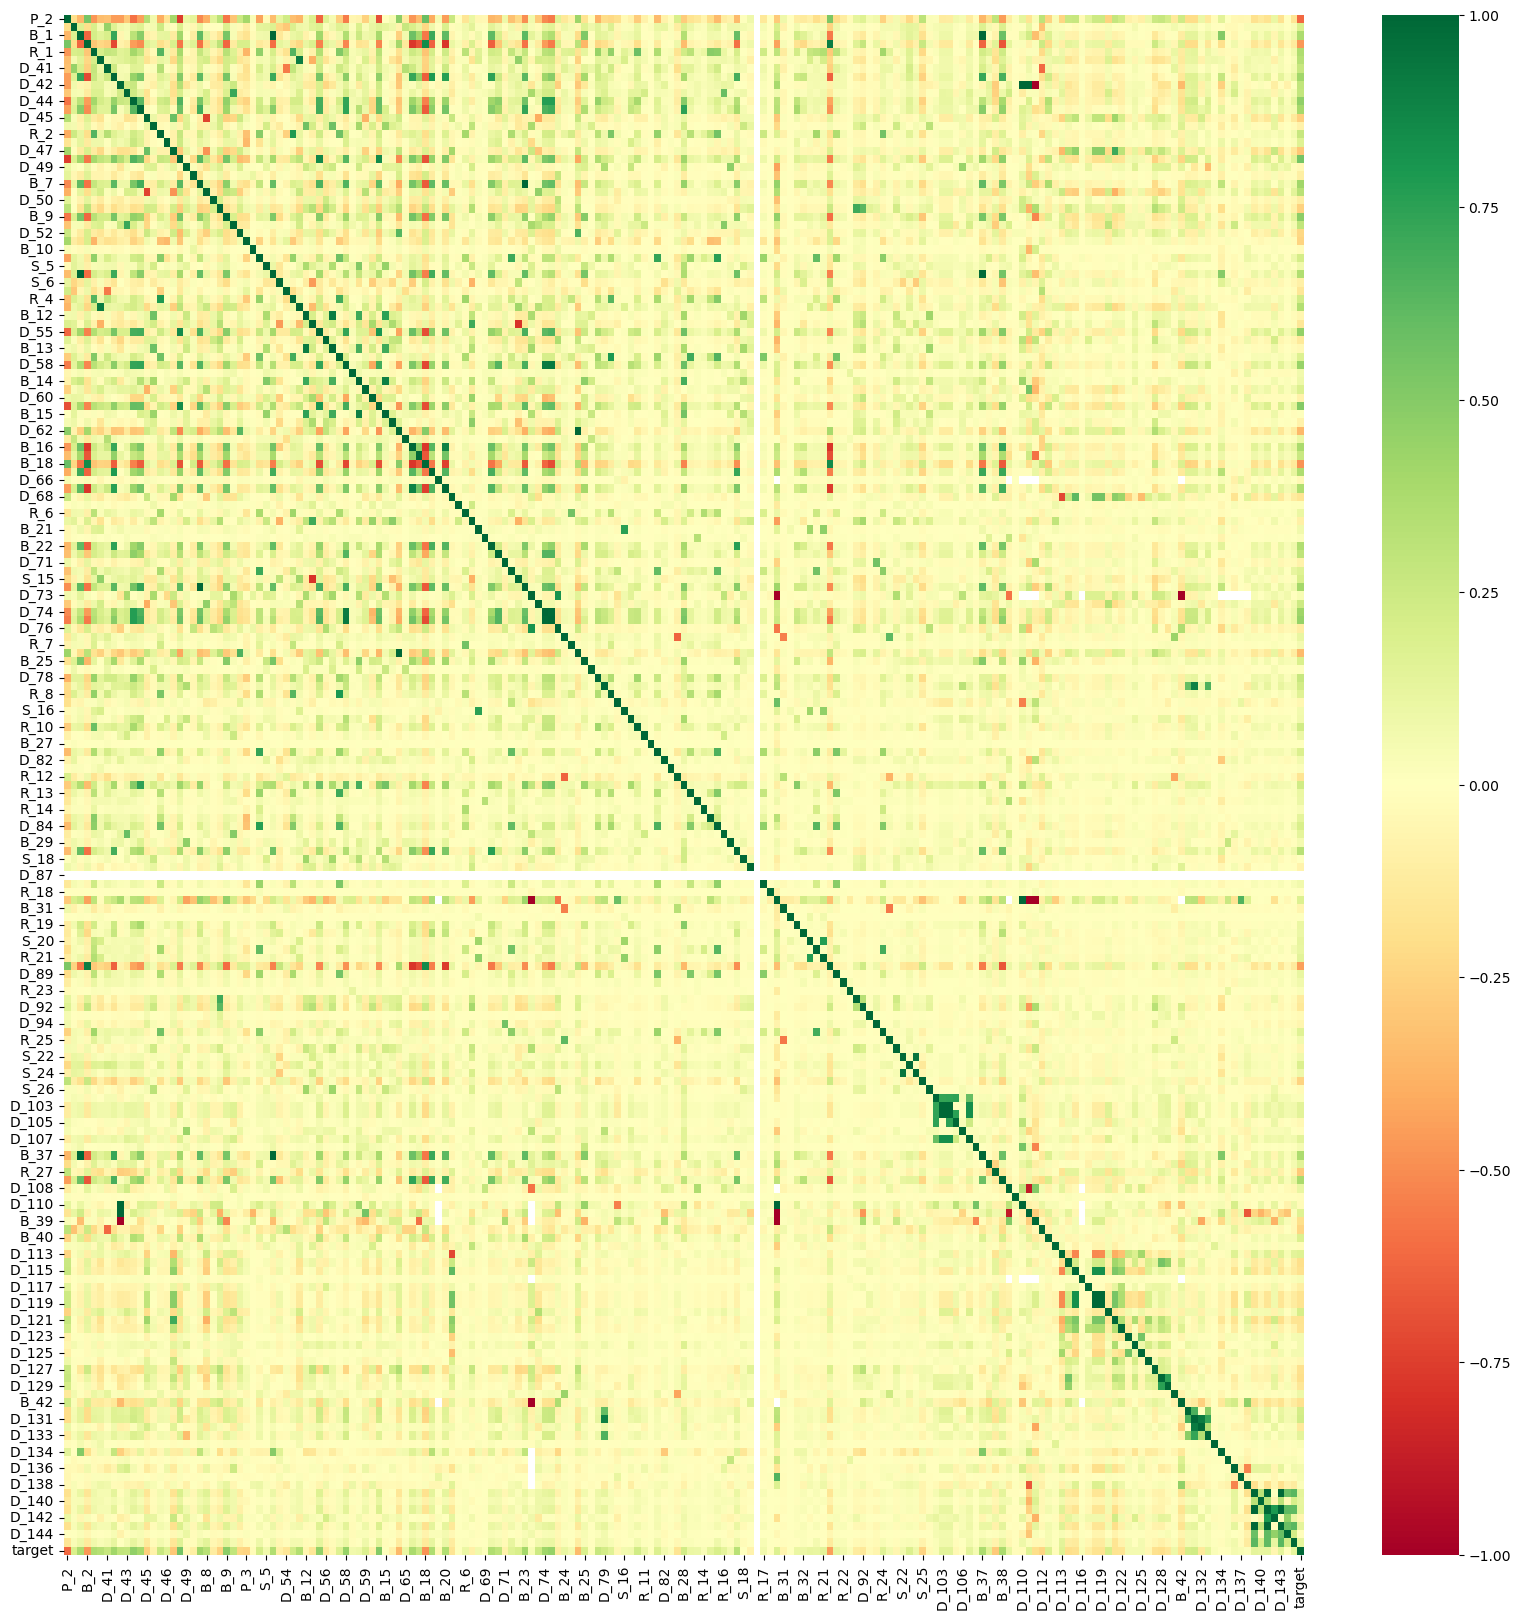

In [51]:
# heat map

#get correlations of each features in dataset
corrmat = eda.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(eda[top_corr_features].corr(),annot=False,cmap="RdYlGn")
plt.savefig('figs/heat_map3.png', dpi=425, bbox_inches='tight')

 
 ***
 

<h2><center>Low Risk Goal: Stepwise Selection Model</center></h2>

### Libraries:

In [54]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
import time

### Data Transformation

In [55]:
# prepare the df
X = ss.values
X.shape

(100000, 140)

In [56]:
# scale the data
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [57]:
# transform the data for PCA()
X_scaled = scaler.transform(ss.values)

### Principal Components Analysis

In [58]:
# fit the PCA
pca = PCA().fit(ss)

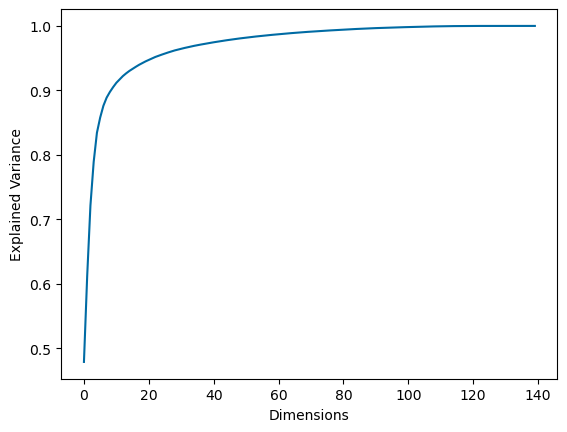

In [59]:
# plot the cumulative variance
cumulative = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumulative)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.savefig('figs/cumulative_variance.png', dpi=425, bbox_inches='tight')
plt.show()

In [60]:
# find the elbow
pca2 = PCA(n_components = 0.95)
x_reduced = pca2.fit_transform(ss.values)
x_reduced.shape

(100000, 23)

Here we see that 23 variables account for 95% of the variation in the data. Therefore, when we do feature selection, we will choose `k=23`.

### Feature Extraction

In [61]:
data = ss.copy()

X = data.iloc[:,0:138]  #independent columns
y = data.iloc[:,-1]    #target column 


#apply SelectKBest class to extract top 23 best features
bestfeatures = SelectKBest(k=23) # removed param 'score_func=chi2,' due to negative values in the ds
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(23,'Score'))  #print 23 best features

   Specs         Score
93   P_2  59365.810637
33   B_9  29778.048588
8   B_18  29631.108849
10   B_2  27456.940054
63  D_44  26035.309480
69  D_55  25573.467028
79  D_75  25549.993158
70  D_58  24347.252963
23  B_33  23946.462997
78  D_74  20735.053988
31   B_7  20320.831893
20   B_3  20119.514664
14  B_23  19530.237242
26   B_4  18560.260921
7   B_16  16561.440436
0    B_1  16050.781462
25  B_37  15656.549636
9   B_19  15408.353111
96   R_1  15263.559144
11  B_20  14793.240020
13  B_22  14432.098017
2   B_11  14230.835631
32   B_8  11376.017450


We can also visualize this:

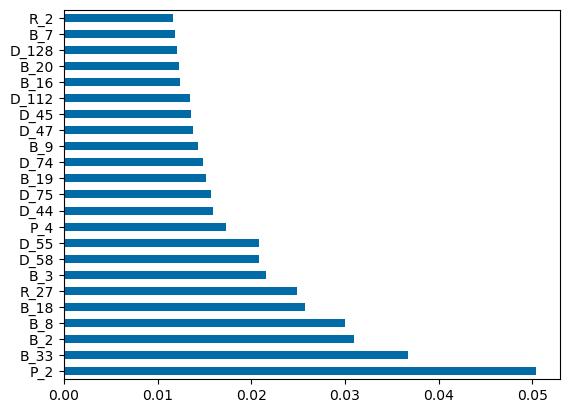

In [62]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(23).plot(kind='barh')
plt.savefig('figs/tree_classifier_visualization_ss.png', dpi=425, bbox_inches='tight')
plt.show()

### Train-Test Split

In [64]:
# Split dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=data['target'])

### Fit the Stepwise Model

In [66]:
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn import metrics

# Perform stepwise regression
sfs = SequentialFeatureSelector(linear_model.LogisticRegression(max_iter=1000),
                                k_features=23,
                                forward=True,
                                scoring='accuracy',
                                cv=None)
selected_features = sfs.fit(X, y)

In [67]:
# Fit a logistic regression model using the selected features
logreg = sfs.estimator
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Metrics

In [68]:
y_pred=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.869


 
 ***
 

<h2><center>Medium-Risk Goal: Compare Random Forest, XGBoost, and SVM Performance</center></h2>

 
 ***
 

<h2><center>Random Forest Model</center></h2>

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

### Fit the Random Forest Model

In [73]:
# build classifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

### Metrics

In [74]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9348


In [75]:
print(metrics.confusion_matrix(y_test, y_pred))

[[7158  303]
 [ 349 2190]]


In [76]:
print(metrics.classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7461
           1       0.88      0.86      0.87      2539

    accuracy                           0.93     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.93      0.93      0.93     10000



 
 ***
 

<h2><center>XGBoost</center></h2>

### Libraries:

In [79]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### Hypertune the parameters

In [83]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import accuracy_score

In [84]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [85]:
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [86]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8592                                                                                                                 
  1%|▌                                                          | 1/100 [00:09<15:38,  9.48s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8548                                                                                                                 
  2%|█▏                                                         | 2/100 [00:16<13:10,  8.07s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8584                                                                                                                 
  3%|█▊                                                         | 3/100 [00:24<12:55,  7.99s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8575                                                                                                                 
  4%|██▎                                                        | 4/100 [00:31<12:10,  7.60s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8557                                                                                                                 
  5%|██▉                                                        | 5/100 [00:38<11:56,  7.54s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.858                                                                                                                  
  6%|███▌                                                       | 6/100 [00:46<12:01,  7.68s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8575                                                                                                                 
  7%|████▏                                                      | 7/100 [00:54<11:54,  7.68s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8575                                                                                                                 
  8%|████▋                                                      | 8/100 [01:03<12:19,  8.04s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8585                                                                                                                 
  9%|█████▎                                                     | 9/100 [01:12<12:55,  8.52s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8592                                                                                                                 
 10%|█████▊                                                    | 10/100 [01:22<13:22,  8.92s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.855                                                                                                                  
 11%|██████▍                                                   | 11/100 [01:31<13:02,  8.79s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8578                                                                                                                 
 12%|██████▉                                                   | 12/100 [01:40<13:04,  8.91s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8542                                                                                                                 
 13%|███████▌                                                  | 13/100 [01:49<12:52,  8.88s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8568                                                                                                                 
 14%|████████                                                  | 14/100 [01:57<12:38,  8.82s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8585                                                                                                                 
 15%|████████▋                                                 | 15/100 [02:08<13:21,  9.43s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8575                                                                                                                 
 16%|█████████▎                                                | 16/100 [02:18<13:11,  9.43s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8543                                                                                                                 
 17%|█████████▊                                                | 17/100 [02:27<12:52,  9.31s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8572                                                                                                                 
 18%|██████████▍                                               | 18/100 [02:36<12:42,  9.30s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8557                                                                                                                 
 19%|███████████                                               | 19/100 [02:45<12:26,  9.22s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8587                                                                                                                 
 20%|███████████▌                                              | 20/100 [02:55<12:35,  9.44s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8583                                                                                                                 
 21%|████████████▏                                             | 21/100 [03:05<12:51,  9.76s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.859                                                                                                                  
 22%|████████████▊                                             | 22/100 [03:16<12:50,  9.88s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.857                                                                                                                  
 23%|█████████████▎                                            | 23/100 [03:25<12:20,  9.62s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8585                                                                                                                 
 24%|█████████████▉                                            | 24/100 [03:35<12:22,  9.76s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8589                                                                                                                 
 25%|██████████████▌                                           | 25/100 [03:45<12:31, 10.01s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.859                                                                                                                  
 26%|███████████████                                           | 26/100 [03:56<12:27, 10.10s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8569                                                                                                                 
 27%|███████████████▋                                          | 27/100 [04:05<11:55,  9.80s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8574                                                                                                                 
 28%|████████████████▏                                         | 28/100 [04:13<11:08,  9.29s/trial, best loss: -0.8592]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8595                                                                                                                 
 29%|████████████████▊                                         | 29/100 [04:22<11:06,  9.39s/trial, best loss: -0.8595]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.86                                                                                                                   
 30%|██████████████████                                          | 30/100 [04:32<11:10,  9.58s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8597                                                                                                                 
 31%|██████████████████▌                                         | 31/100 [04:42<11:08,  9.69s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8577                                                                                                                 
 32%|███████████████████▏                                        | 32/100 [04:52<10:54,  9.63s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8575                                                                                                                 
 33%|███████████████████▊                                        | 33/100 [05:01<10:37,  9.51s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8592                                                                                                                 
 34%|████████████████████▍                                       | 34/100 [05:11<10:38,  9.68s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8553                                                                                                                 
 35%|█████████████████████                                       | 35/100 [05:20<10:13,  9.44s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8569                                                                                                                 
 36%|█████████████████████▌                                      | 36/100 [05:29<09:57,  9.33s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8575                                                                                                                 
 37%|██████████████████████▏                                     | 37/100 [05:39<09:49,  9.35s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.858                                                                                                                  
 38%|██████████████████████▊                                     | 38/100 [05:48<09:42,  9.39s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8594                                                                                                                 
 39%|███████████████████████▍                                    | 39/100 [05:58<09:50,  9.68s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.858                                                                                                                  
 40%|████████████████████████                                    | 40/100 [06:08<09:32,  9.54s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8595                                                                                                                 
 41%|████████████████████████▌                                   | 41/100 [06:19<09:53, 10.05s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8584                                                                                                                 
 42%|█████████████████████████▏                                  | 42/100 [06:28<09:20,  9.67s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8575                                                                                                                 
 43%|█████████████████████████▊                                  | 43/100 [06:37<09:06,  9.60s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8589                                                                                                                 
 44%|██████████████████████████▍                                 | 44/100 [06:48<09:14,  9.90s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8576                                                                                                                 
 45%|███████████████████████████                                 | 45/100 [06:57<09:01,  9.85s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8576                                                                                                                 
 46%|███████████████████████████▌                                | 46/100 [07:07<08:40,  9.63s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8579                                                                                                                 
 47%|████████████████████████████▏                               | 47/100 [07:16<08:23,  9.50s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8562                                                                                                                 
 48%|████████████████████████████▊                               | 48/100 [07:25<08:05,  9.33s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8592                                                                                                                 
 49%|█████████████████████████████▍                              | 49/100 [07:35<08:07,  9.55s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.858                                                                                                                  
 50%|██████████████████████████████                              | 50/100 [07:44<07:50,  9.41s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8574                                                                                                                 
 51%|██████████████████████████████▌                             | 51/100 [07:53<07:33,  9.26s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8577                                                                                                                 
 52%|███████████████████████████████▏                            | 52/100 [08:03<07:32,  9.44s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8588                                                                                                                 
 53%|███████████████████████████████▊                            | 53/100 [08:13<07:37,  9.73s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.857                                                                                                                  
 54%|████████████████████████████████▍                           | 54/100 [08:22<07:22,  9.63s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8588                                                                                                                 
 55%|█████████████████████████████████                           | 55/100 [08:32<07:15,  9.68s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8561                                                                                                                 
 56%|█████████████████████████████████▌                          | 56/100 [08:41<06:55,  9.45s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8584                                                                                                                 
 57%|██████████████████████████████████▏                         | 57/100 [08:51<06:54,  9.65s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8586                                                                                                                 
 58%|██████████████████████████████████▊                         | 58/100 [09:02<06:58,  9.95s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8574                                                                                                                 
 59%|███████████████████████████████████▍                        | 59/100 [09:11<06:38,  9.72s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8583                                                                                                                 
 60%|████████████████████████████████████                        | 60/100 [09:20<06:18,  9.46s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.856                                                                                                                  
 61%|████████████████████████████████████▌                       | 61/100 [09:29<06:09,  9.46s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8587                                                                                                                 
 62%|█████████████████████████████████████▏                      | 62/100 [09:39<06:05,  9.62s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8574                                                                                                                 
 63%|█████████████████████████████████████▊                      | 63/100 [09:49<05:51,  9.50s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8583                                                                                                                 
 64%|██████████████████████████████████████▍                     | 64/100 [09:58<05:38,  9.40s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8576                                                                                                                 
 65%|███████████████████████████████████████                     | 65/100 [10:07<05:29,  9.41s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8592                                                                                                                 
 66%|███████████████████████████████████████▌                    | 66/100 [10:17<05:26,  9.60s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8595                                                                                                                 
 67%|████████████████████████████████████████▏                   | 67/100 [10:27<05:22,  9.78s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8597                                                                                                                 
 68%|████████████████████████████████████████▊                   | 68/100 [10:38<05:20, 10.03s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8595                                                                                                                 
 69%|█████████████████████████████████████████▍                  | 69/100 [10:48<05:11, 10.05s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.859                                                                                                                  
 70%|██████████████████████████████████████████                  | 70/100 [11:00<05:16, 10.55s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8596                                                                                                                 
 71%|██████████████████████████████████████████▌                 | 71/100 [11:11<05:08, 10.65s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8583                                                                                                                 
 72%|███████████████████████████████████████████▏                | 72/100 [11:20<04:47, 10.26s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8587                                                                                                                 
 73%|███████████████████████████████████████████▊                | 73/100 [11:30<04:36, 10.25s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8575                                                                                                                 
 74%|████████████████████████████████████████████▍               | 74/100 [11:39<04:14,  9.79s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8578                                                                                                                 
 75%|█████████████████████████████████████████████               | 75/100 [11:48<04:01,  9.67s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8587                                                                                                                 
 76%|█████████████████████████████████████████████▌              | 76/100 [11:59<03:55,  9.83s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8578                                                                                                                 
 77%|██████████████████████████████████████████████▏             | 77/100 [12:08<03:44,  9.75s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.86                                                                                                                   
 78%|██████████████████████████████████████████████▊             | 78/100 [12:19<03:38,  9.93s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8594                                                                                                                 
 79%|███████████████████████████████████████████████▍            | 79/100 [12:29<03:33, 10.15s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8599                                                                                                                 
 80%|████████████████████████████████████████████████            | 80/100 [12:39<03:23, 10.19s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8588                                                                                                                 
 81%|████████████████████████████████████████████████▌           | 81/100 [12:49<03:10, 10.04s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8574                                                                                                                 
 82%|█████████████████████████████████████████████████▏          | 82/100 [12:59<03:01, 10.07s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8589                                                                                                                 
 83%|█████████████████████████████████████████████████▊          | 83/100 [13:10<02:54, 10.26s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8593                                                                                                                 
 84%|██████████████████████████████████████████████████▍         | 84/100 [13:20<02:44, 10.29s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8581                                                                                                                 
 85%|███████████████████████████████████████████████████         | 85/100 [13:30<02:30, 10.00s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8586                                                                                                                 
 86%|███████████████████████████████████████████████████▌        | 86/100 [13:39<02:16,  9.72s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.856                                                                                                                  
 87%|████████████████████████████████████████████████████▏       | 87/100 [13:48<02:03,  9.48s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8578                                                                                                                 
 88%|████████████████████████████████████████████████████▊       | 88/100 [13:58<01:55,  9.65s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8554                                                                                                                 
 89%|█████████████████████████████████████████████████████▍      | 89/100 [14:07<01:44,  9.51s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8594                                                                                                                 
 90%|██████████████████████████████████████████████████████      | 90/100 [14:18<01:39,  9.99s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8588                                                                                                                 
 91%|██████████████████████████████████████████████████████▌     | 91/100 [14:28<01:30, 10.10s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8578                                                                                                                 
 92%|███████████████████████████████████████████████████████▏    | 92/100 [14:38<01:19,  9.92s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8546                                                                                                                 
 93%|███████████████████████████████████████████████████████▊    | 93/100 [14:47<01:07,  9.62s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8586                                                                                                                 
 94%|████████████████████████████████████████████████████████▍   | 94/100 [14:57<00:58,  9.68s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8578                                                                                                                 
 95%|█████████████████████████████████████████████████████████   | 95/100 [15:06<00:47,  9.59s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8583                                                                                                                 
 96%|█████████████████████████████████████████████████████████▌  | 96/100 [15:15<00:38,  9.52s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8594                                                                                                                 
 97%|██████████████████████████████████████████████████████████▏ | 97/100 [15:25<00:29,  9.67s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.858                                                                                                                  
 98%|██████████████████████████████████████████████████████████▊ | 98/100 [15:35<00:19,  9.56s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8596                                                                                                                 
 99%|███████████████████████████████████████████████████████████▍| 99/100 [15:45<00:09,  9.71s/trial, best loss: -0.86]

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.8591                                                                                                                 
100%|███████████████████████████████████████████████████████████| 100/100 [15:55<00:00,  9.56s/trial, best loss: -0.86]


In [87]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.6658690398324932, 'gamma': 1.2017300442956178, 'max_depth': 16.0, 'min_child_weight': 6.0, 'reg_alpha': 67.0, 'reg_lambda': 0.34479161270803393}


### Fit the XGBoost Model

In [88]:
xgb_model = XGBClassifier(colsample_bytree=0.5535093367114597, gamma= 4.537127790284473, max_depth= 8,
                          min_child_weight= 9, reg_alpha=52, reg_lambda= 0.8860343763268222)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state=0)
%time xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_val, y_val)], verbose=False)

C:\Users\carol\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Wall time: 40.3 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5535093367114597, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=4.537127790284473, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=9, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

### Print the metrics

In [89]:
from sklearn.metrics import accuracy_score
pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, pred>0.5)
print ("Accuracy:", accuracy)

Accuracy: 0.9222


 
 ***
 

<h2><center>Support Vector Machine</h2></center>

### Libraries:

In [90]:
from sklearn.svm import SVC
%matplotlib inline

### Fit the SVM Model

In [91]:
svclassifier = SVC(gamma="auto")
svclassifier.fit(X_train, y_train)

SVC(gamma='auto')

### Print the metrics

In [92]:
from sklearn.metrics import accuracy_score
pred1 = svclassifier.predict(X_test)
accuracy1 = accuracy_score(y_test, pred1>0.5)
print ("Accuracy:", accuracy1)

Accuracy: 0.879


 
 ***
 

<h2><center>Moving Forward</center></h2>

In progress:
- Transforming Categorical variables and Date-Time variable into useful format
- Hypertuning (`gridsearchCV` or similar optimizer for 3 main algorithms) 
- Adjusting the % nulls accepted in the modeled DS
- Run on full DS using pyarrow, other libraries as necessary to reduce data usage

High-risk goal: 
- Run our algorithms using random oversampling (per Almustfa, Khatir, and Bee's 2022 paper) and compare the results
- Compare different data balances to determine results on accuracy, sensitivity, specificity